In [5]:
import pandas as pd
import numpy as np

In [6]:
#df = pd.read_csv("accepted_2007_to_2018Q4.csv")

In [7]:
import psutil
print(f"Total RAM: {psutil.virtual_memory().total / 1e9:.2f} GB")

Total RAM: 8.38 GB


In [8]:
#df

In [9]:
#df.columns

In [10]:
#df = df.dropna(subset=["loan_status"])

In [11]:
#reduce the data size to fasten following steps, otherwise the memory will soon run out
#complete_df = df.sample(n=100000, random_state=42)

In [12]:
#complete_df

In [13]:
#complete_df.to_csv("complete_df.csv", index=False)

In [14]:
complete_df = pd.read_csv("complete_df.csv")

In [15]:
complete_df.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [16]:
complete_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,9785323,NaN,28000.0,28000.0,28000.0,36 months,6.62,859.71,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,78558461,NaN,10650.0,10650.0,10650.0,36 months,25.11,424.07,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,110757806,NaN,18000.0,18000.0,18000.0,36 months,10.91,588.54,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,96668860,NaN,3975.0,3975.0,3975.0,36 months,17.99,143.69,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,118207599,NaN,4800.0,4800.0,4800.0,36 months,16.02,168.81,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Get the unique values from the 'loan_status' column
unique_statuses = complete_df['loan_status'].unique()

print("All unique values in the 'loan_status' column:")
print(unique_statuses)

All unique values in the 'loan_status' column:
['Fully Paid' 'Current' 'Charged Off' 'Late (31-120 days)'
 'Late (16-30 days)' 'Does not meet the credit policy. Status:Charged Off'
 'Does not meet the credit policy. Status:Fully Paid' 'In Grace Period'
 'Default']


Fully Paid: Good. This is our primary 0 or "good loan" class.

Current: Good. The loan is up-to-date.

Charged Off, Late (31-120 days), Late (16-30 days), Does not meet the credit policy. Status : Charged Off, In Grace Period, Default: All of these represent a failed or failing loan. This is our 1 or "bad loan" class. 

In [18]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off",
            "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]

In [19]:
complete_df['loan_condition_int'] = complete_df['loan_status'].apply(lambda status: 1 if status in bad_loan else 0).astype(int)

In [20]:
complete_df['loan_condition_int'].value_counts()

loan_condition_int
0    86628
1    13372
Name: count, dtype: int64

## Very Imbalanced

In [21]:
complete_df['loan_condition'] = np.where(complete_df['loan_condition_int'] == 0, 'Good Loan', 'Bad Loan')

In [22]:
complete_df['loan_condition']

0        Good Loan
1        Good Loan
2        Good Loan
3        Good Loan
4        Good Loan
           ...    
99995    Good Loan
99996    Good Loan
99997    Good Loan
99998     Bad Loan
99999    Good Loan
Name: loan_condition, Length: 100000, dtype: object

In [23]:
complete_df['emp_length'].unique()

array(['10+ years', '9 years', '2 years', '< 1 year', '8 years',
       '7 years', '6 years', nan, '4 years', '1 year', '5 years',
       '3 years'], dtype=object)

In [24]:
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    'nan': 0
}

In [25]:
complete_df['emp_length_int'] = complete_df['emp_length'].map(emp_length_mapping)

In [26]:
complete_df['emp_length_int'].value_counts()

emp_length_int
10.0    33050
2.0      9047
0.5      8500
3.0      7946
1.0      6597
5.0      6181
4.0      5960
6.0      4454
7.0      4178
8.0      4085
9.0      3471
Name: count, dtype: int64

In [27]:
complete_df['emp_length_int'].head().transpose()

0    10.0
1    10.0
2     9.0
3     2.0
4     0.5
Name: emp_length_int, dtype: float64

In [28]:
complete_df['addr_state'].unique()

array(['PA', 'WA', 'FL', 'NC', 'VA', 'NJ', 'OR', 'IN', 'TX', 'CA', 'MA',
       'NY', 'AL', 'GA', 'AZ', 'OK', 'LA', 'IL', 'CO', 'WV', 'MN', 'OH',
       'TN', 'NM', 'HI', 'MO', 'MD', 'WI', 'MI', 'UT', 'WY', 'NV', 'SC',
       'NE', 'KY', 'RI', 'MS', 'CT', 'MT', 'DC', 'AK', 'DE', 'SD', 'AR',
       'NH', 'KS', 'ID', 'ME', 'ND', 'VT'], dtype=object)

In [29]:
state_to_region = {
    'CA': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'CO': 'West',
    'NV': 'West', 'AK': 'West', 'MT': 'West', 'HI': 'West', 'WY': 'West', 'ID': 'West',
    'AZ': 'SouthWest', 'TX': 'SouthWest', 'NM': 'SouthWest', 'OK': 'SouthWest',
    'GA': 'SouthEast', 'NC': 'SouthEast', 'VA': 'SouthEast', 'FL': 'SouthEast', 'KY': 'SouthEast',
    'SC': 'SouthEast', 'LA': 'SouthEast', 'AL': 'SouthEast', 'WV': 'SouthEast', 'DC': 'SouthEast',
    'AR': 'SouthEast', 'DE': 'SouthEast', 'MS': 'SouthEast', 'TN': 'SouthEast',
    'IL': 'MidWest', 'MO': 'MidWest', 'MN': 'MidWest', 'OH': 'MidWest', 'WI': 'MidWest',
    'KS': 'MidWest', 'MI': 'MidWest', 'SD': 'MidWest', 'IA': 'MidWest', 'NE': 'MidWest',
    'IN': 'MidWest', 'ND': 'MidWest',
    'CT': 'NorthEast', 'NY': 'NorthEast', 'PA': 'NorthEast', 'NJ': 'NorthEast', 'RI': 'NorthEast',
    'MA': 'NorthEast', 'MD': 'NorthEast', 'VT': 'NorthEast', 'NH': 'NorthEast', 'ME': 'NorthEast'
}

In [30]:
complete_df['region'] = complete_df['addr_state'].map(state_to_region)

In [31]:
complete_df['region'].value_counts()

region
SouthEast    24329
NorthEast    23006
West         22837
MidWest      17737
SouthWest    12091
Name: count, dtype: int64

In [32]:
complete_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_condition_int,loan_condition,emp_length_int,region
0,9785323,NaN,28000.0,28000.0,28000.0,36 months,6.62,859.71,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Good Loan,10.0,NorthEast
1,78558461,NaN,10650.0,10650.0,10650.0,36 months,25.11,424.07,F,F1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Good Loan,10.0,West
2,110757806,NaN,18000.0,18000.0,18000.0,36 months,10.91,588.54,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Good Loan,9.0,SouthEast
3,96668860,NaN,3975.0,3975.0,3975.0,36 months,17.99,143.69,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Good Loan,2.0,SouthEast
4,118207599,NaN,4800.0,4800.0,4800.0,36 months,16.02,168.81,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Good Loan,0.5,SouthEast


In [33]:
complete_df.isnull().sum().to_list()

[0,
 100000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7421,
 6531,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 94287,
 0,
 1021,
 0,
 0,
 72,
 0,
 0,
 0,
 0,
 0,
 51210,
 84261,
 0,
 0,
 0,
 84,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 120,
 0,
 59586,
 2,
 0,
 0,
 5,
 74306,
 0,
 0,
 94691,
 94691,
 94899,
 0,
 3105,
 3105,
 38548,
 38548,
 38548,
 38548,
 40616,
 38548,
 47537,
 38548,
 38548,
 38548,
 38555,
 3105,
 38548,
 38548,
 38548,
 2170,
 3108,
 3250,
 3302,
 5,
 0,
 6288,
 3105,
 3105,
 3105,
 2170,
 3174,
 76908,
 13159,
 67099,
 3105,
 3105,
 3105,
 2559,
 3105,
 3105,
 3105,
 3105,
 3105,
 2559,
 6824,
 3105,
 3105,
 3105,
 3113,
 3271,
 70,
 5,
 3105,
 2170,
 2170,
 3105,
 95198,
 95198,
 95198,
 95198,
 95198,
 95198,
 95198,
 95282,
 95198,
 95198,
 95198,
 95198,
 98422,
 0,
 99530,
 99530,
 99530,
 99530,
 99530,
 99530,
 99530,
 99530,
 99530,
 99530,
 99530,
 99639,
 99530,
 99530,
 0,
 0,
 98497,
 98497,
 98497,
 98497,
 98497,
 98497,
 0,
 0,
 6531,
 0]

In [34]:
EDA_df = complete_df.copy()

In [35]:
EDA_cat_columns = EDA_df.select_dtypes(include=['object']).columns.tolist()

In [36]:
EDA_cat_columns

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'loan_condition',
 'region']

In [37]:
EDA_num_columns = EDA_df.select_dtypes(exclude=['object']).columns.tolist()

In [38]:
EDA_num_columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cu

In [39]:
filtered_EDA_cat_columns = [col for col in EDA_cat_columns if EDA_df[col].nunique() <= 50]

In [40]:
filtered_EDA_cat_columns

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'settlement_status',
 'loan_condition',
 'region']

In [41]:
print(f"Numerical columns for EDA: {EDA_num_columns}")
print(f"Categorical columns for EDA: {filtered_EDA_cat_columns}")

Numerical columns for EDA: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
EDA_df['is_default'] = EDA_df['loan_status'].isin(bad_loan).astype(int)

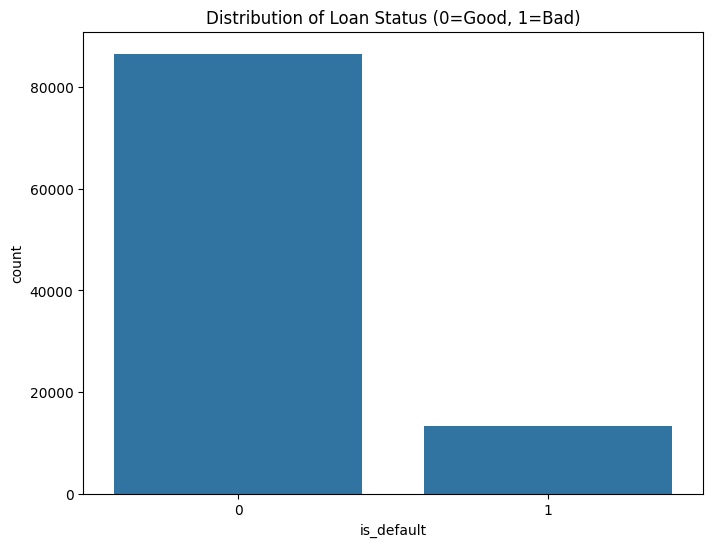

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_default', data=EDA_df)
plt.title('Distribution of Loan Status (0=Good, 1=Bad)')
plt.show()

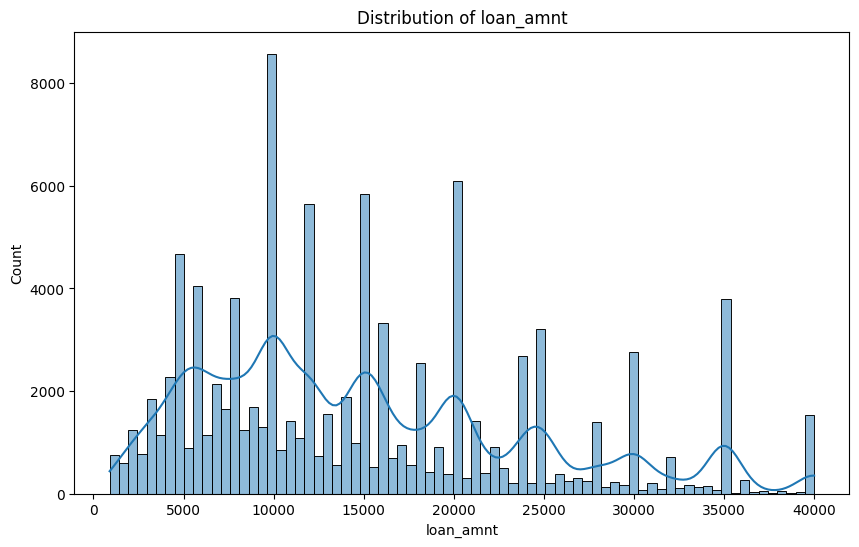

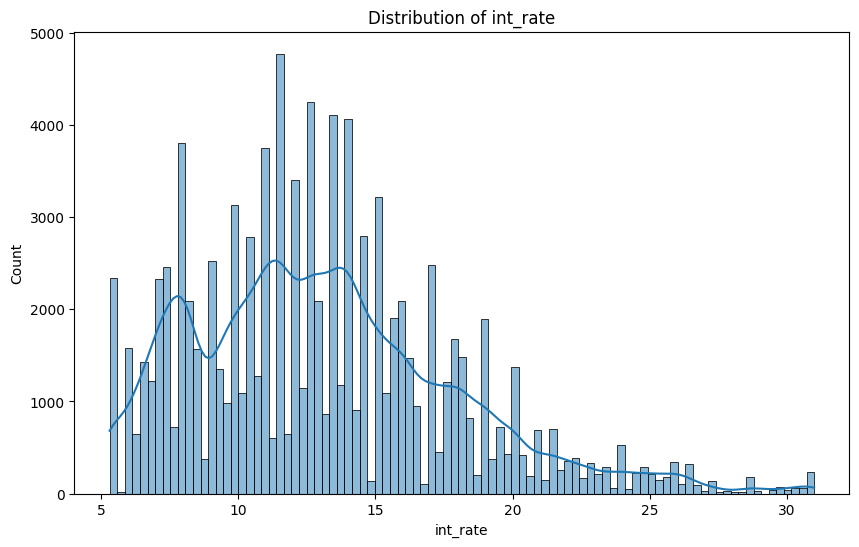

In [45]:
# Let's look at a few key numerical feature distributions
numerical_features_to_plot = ['loan_amnt', 'int_rate']
for col in numerical_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(EDA_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

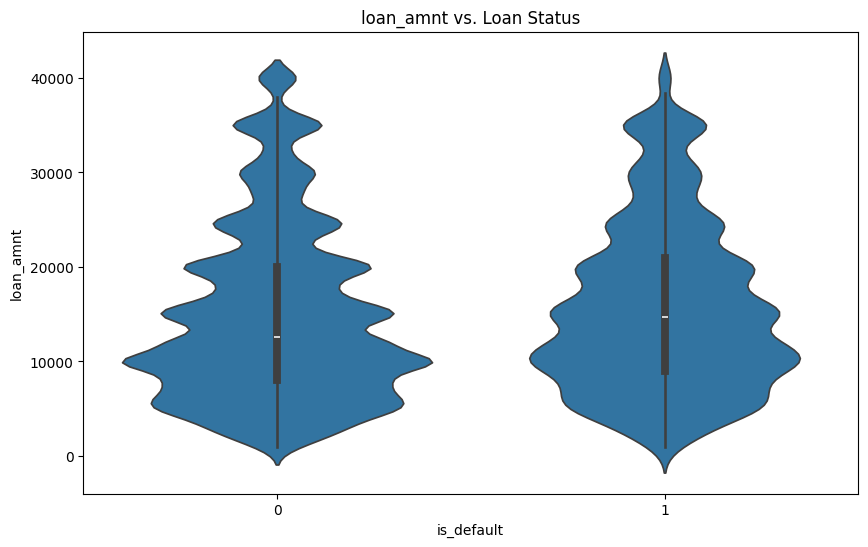

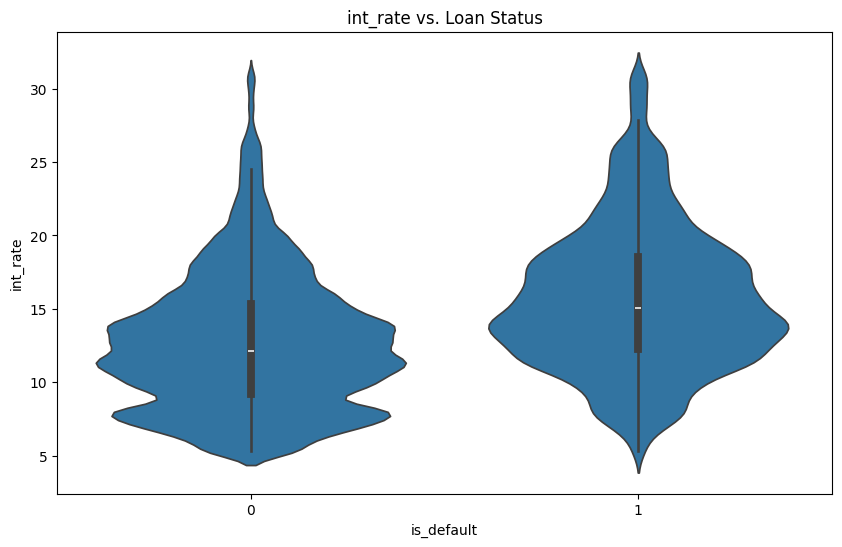

In [46]:
for col in numerical_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='is_default', y=col, data=EDA_df)
    plt.title(f'{col} vs. Loan Status')
    plt.show() 


<Figure size 1200x600 with 0 Axes>

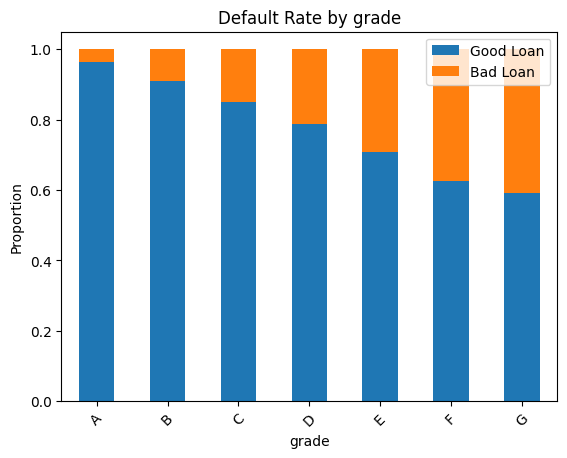

<Figure size 1200x600 with 0 Axes>

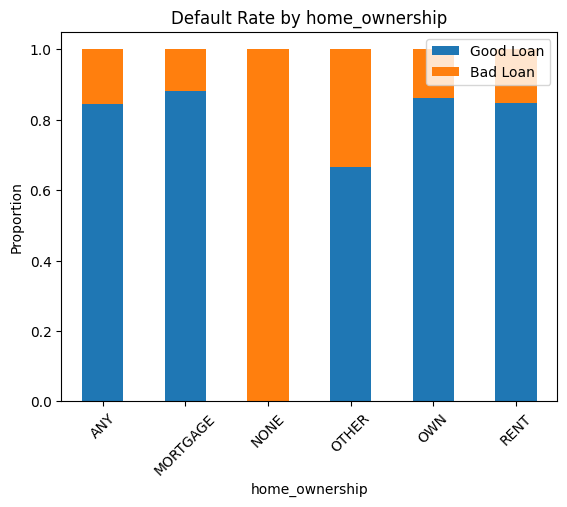

<Figure size 1200x600 with 0 Axes>

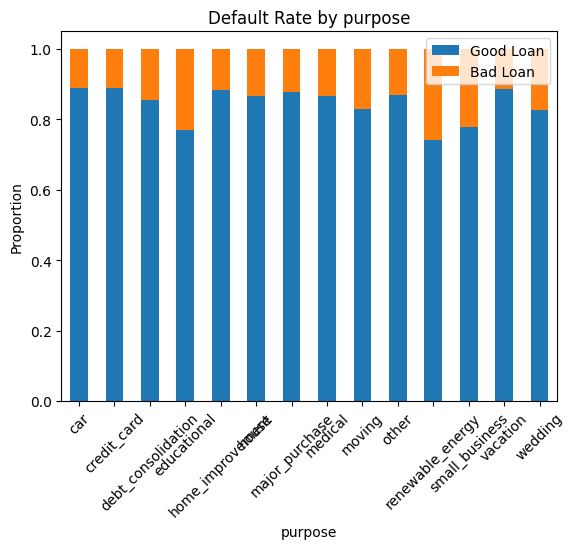

<Figure size 1200x600 with 0 Axes>

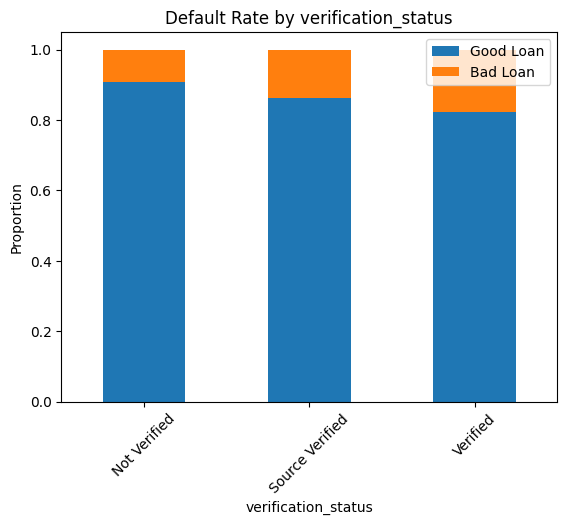

<Figure size 1200x600 with 0 Axes>

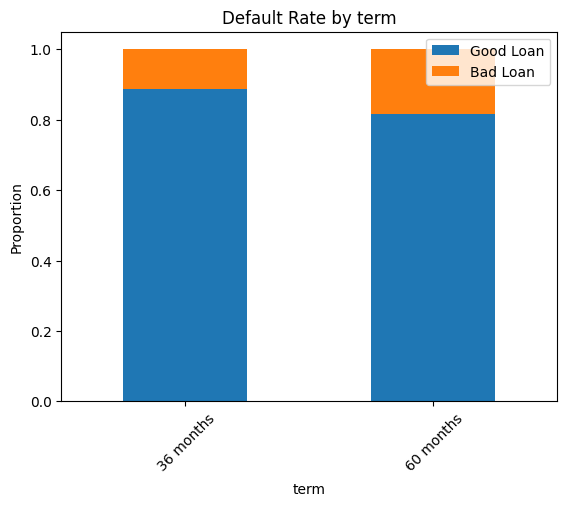

In [47]:
categorical_features_to_plot = ['grade', 'home_ownership', 'purpose', 'verification_status', 'term']
for col in categorical_features_to_plot:
    plt.figure(figsize=(12, 6))
    # Count the number of good and bad loans for each category
    counts = EDA_df.groupby([col, 'is_default']).size().unstack(fill_value=0)
    # Normalize to show the percentage of defaults for each category
    default_rate = counts.div(counts.sum(axis=1), axis=0)
    default_rate.plot(kind='bar', stacked=True)
    plt.title(f'Default Rate by {col}')
    plt.ylabel('Proportion')
    plt.legend(['Good Loan', 'Bad Loan'])
    plt.xticks(rotation=45)
    plt.show()

# Data Cleaning

In [48]:
complete_df.dtypes

id                      int64
member_id             float64
loan_amnt             float64
funded_amnt           float64
funded_amnt_inv       float64
                       ...   
settlement_term       float64
loan_condition_int      int32
loan_condition         object
emp_length_int        float64
region                 object
Length: 155, dtype: object

In [49]:
pd.value_counts(complete_df.loan_status).to_frame().reset_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14316\3920205029.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(complete_df.loan_status).to_frame().reset_index()


,loan_status,count
0,Fully Paid,47718
1,Current,38822
2,Charged Off,11868
3,Late (31-120 days),946
4,In Grace Period,335
5,Late (16-30 days),185
6,Does not meet the credit policy. Status:Fully ...,88
7,Does not meet the credit policy. Status:Charge...,36
8,Default,2


1 Ajustment: change the classification of good loans and bad loans

Current and Issued should be excluded, as they did not indicate the direction of the loans (it was unclear whether they were associated with good or bad loans).

In [50]:
drop_df = complete_df
drop_df = complete_df[~complete_df['loan_status'].isin(['Current', 'Issued',
                                #  'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)',
                                # 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'
                                                           ])]

In [51]:
#drop_df

2 Delete variables with more than 80% missing valuesd.

In [52]:
def get_missing_value_stats(input_df):
    df_null = pd.DataFrame({
        'Missing Count': input_df.isnull().sum(),
        'Missing Percent': 100 * input_df.isnull().sum() / len(input_df),
        'Type': input_df.dtypes
    })
    missing_values = df_null[df_null['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False) #改
    return missing_values

def get_value_stats(input_df):
    df_null = pd.DataFrame({
        '#Count': input_df.notna().sum(),
        '%Populated': 100 * input_df.notna().sum() / len(input_df),
        '#Unique Values':input_df.nunique(),
        'Most Common Value': input_df.mode().iloc[0],
        'Type': input_df.dtypes
    })

    missing_values = df_null[df_null['#Count'] > 0].sort_values(by='#Count', ascending=False)

    return missing_values


get_missing_value_stats(drop_df)

,Missing Count,Missing Percent,Type
member_id,61178,100.000000,float64
orig_projected_additional_accrued_interest,60930,99.594626,float64
sec_app_mths_since_last_major_derog,60832,99.434437,float64
hardship_reason,60824,99.421361,object
hardship_dpd,60824,99.421361,float64
...,...,...,...
dti,28,0.045768,float64
chargeoff_within_12_mths,5,0.008173,float64
collections_12_mths_ex_med,5,0.008173,float64
tax_liens,5,0.008173,float64


In [53]:
drop_df = drop_df.dropna(axis=1, thresh=int(0.20*len(drop_df)))

In [54]:
get_missing_value_stats(drop_df)

,Missing Count,Missing Percent,Type
mths_since_recent_bc_dlq,46552,76.092713,float64
mths_since_last_major_derog,44984,73.529700,float64
mths_since_recent_revol_delinq,40485,66.175749,float64
il_util,39485,64.541175,float64
mths_since_rcnt_il,36807,60.163784,float64
...,...,...,...
dti,28,0.045768,float64
collections_12_mths_ex_med,5,0.008173,float64
tax_liens,5,0.008173,float64
chargeoff_within_12_mths,5,0.008173,float64


3 Delete dynamic indicators

In fact, certain variables directly indicate the outcome of the loan condition, such as the total_rec_prnp (Principal received to date) shown in the chart. If this value is equal to the loan_amnt (loan amount), it directly signifies that the loan is a good loan. In other words, since we assume that we are within the loan repayment period for prediction purposes, we should eliminate variables that change before and after the loan term, and ensure that only variables directly influencing the loan condition outcome are preserved.

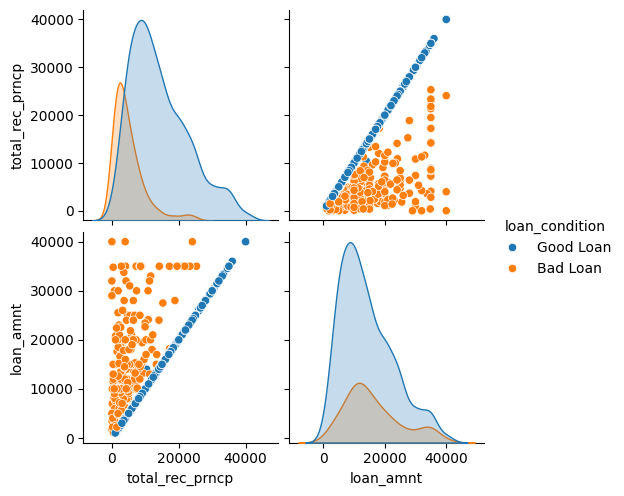

In [55]:
sns.pairplot(drop_df[['total_rec_prncp', 'loan_condition', 'loan_amnt']].sample(n=1000, random_state=42), hue='loan_condition')

In [56]:
direct_indicators = [
    'collection_recovery_fee',
    'last_pymnt_amnt',
    'out_prncp',
    'out_prncp_inv',
    'recoveries',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp'
]

In [57]:
drop_df.drop(direct_indicators, axis=1, inplace=True, errors='ignore')

In [58]:
drop_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition,emp_length_int,region
0,9785323,28000.0,28000.0,28000.0,36 months,6.62,859.71,A,A2,regional manager,...,82341.0,6100.0,68795.0,N,Cash,N,0,Good Loan,10.0,NorthEast
1,78558461,10650.0,10650.0,10650.0,36 months,25.11,424.07,F,F1,TRUCK DRIVER,...,35276.0,10700.0,37183.0,N,Cash,N,0,Good Loan,10.0,West
3,96668860,3975.0,3975.0,3975.0,36 months,17.99,143.69,D,D2,Service Advisor,...,31940.0,4000.0,33457.0,N,Cash,N,0,Good Loan,2.0,SouthEast
6,65773560,15000.0,15000.0,15000.0,36 months,6.24,457.97,A,A2,Professor,...,129514.0,72000.0,132000.0,N,Cash,N,0,Good Loan,8.0,SouthEast
8,8604784,8000.0,8000.0,8000.0,36 months,9.67,256.90,B,B1,Lead Mammographer,...,24434.0,11000.0,20350.0,N,Cash,N,0,Good Loan,10.0,MidWest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,55298455,35000.0,35000.0,35000.0,60 months,17.57,880.61,D,D4,Project Manager,...,41796.0,30500.0,24088.0,N,Cash,N,0,Good Loan,10.0,SouthEast
99996,3365462,13000.0,13000.0,13000.0,36 months,13.11,438.72,B,B4,Bank of America,...,40178.0,11000.0,41876.0,N,Cash,N,0,Good Loan,8.0,West
99997,48605201,2500.0,2500.0,2500.0,36 months,15.61,87.42,D,D1,Customer Service,...,17251.0,13300.0,2405.0,N,Cash,N,0,Good Loan,2.0,MidWest
99998,56117368,14400.0,14400.0,14400.0,60 months,9.17,300.11,B,B2,Human Resources/Payroll/Purchasing,...,40123.0,38100.0,37671.0,N,Cash,N,1,Bad Loan,8.0,SouthEast


4 Delete repetitive and useless object variables

In [59]:
#drop repeated features
# drop_df.drop(['loan_condition'], axis=1, inplace=True)
# drop_df.drop(['loan_status'], axis=1, inplace=True)
drop_df.drop(['emp_length'], axis=1, inplace=True)

In [60]:
drop_df.drop(['id','emp_title','url','title','zip_code'], axis=1, inplace=True)

In [61]:
drop_df.select_dtypes(include=["object"]).nunique()  

term                      2
grade                     7
sub_grade                35
home_ownership            6
verification_status       3
issue_d                 138
loan_status               8
pymnt_plan                2
purpose                  14
addr_state               50
earliest_cr_line        630
initial_list_status       2
last_pymnt_d            134
last_credit_pull_d      123
application_type          2
hardship_flag             2
disbursement_method       2
debt_settlement_flag      2
loan_condition            2
region                    5
dtype: int64

In [62]:
drop_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition,emp_length_int,region
0,28000.0,28000.0,28000.0,36 months,6.62,859.71,A,A2,MORTGAGE,125000.0,...,82341.0,6100.0,68795.0,N,Cash,N,0,Good Loan,10.0,NorthEast
1,10650.0,10650.0,10650.0,36 months,25.11,424.07,F,F1,MORTGAGE,83000.0,...,35276.0,10700.0,37183.0,N,Cash,N,0,Good Loan,10.0,West
3,3975.0,3975.0,3975.0,36 months,17.99,143.69,D,D2,ANY,43000.0,...,31940.0,4000.0,33457.0,N,Cash,N,0,Good Loan,2.0,SouthEast
6,15000.0,15000.0,15000.0,36 months,6.24,457.97,A,A2,MORTGAGE,231800.0,...,129514.0,72000.0,132000.0,N,Cash,N,0,Good Loan,8.0,SouthEast
8,8000.0,8000.0,8000.0,36 months,9.67,256.90,B,B1,MORTGAGE,72000.0,...,24434.0,11000.0,20350.0,N,Cash,N,0,Good Loan,10.0,MidWest


In [63]:
drop_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_o

In [64]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61178 entries, 0 to 99999
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       61178 non-null  float64
 1   funded_amnt                     61178 non-null  float64
 2   funded_amnt_inv                 61178 non-null  float64
 3   term                            61178 non-null  object 
 4   int_rate                        61178 non-null  float64
 5   installment                     61178 non-null  float64
 6   grade                           61178 non-null  object 
 7   sub_grade                       61178 non-null  object 
 8   home_ownership                  61178 non-null  object 
 9   annual_inc                      61178 non-null  float64
 10  verification_status             61178 non-null  object 
 11  issue_d                         61178 non-null  object 
 12  loan_status                     61178

In [65]:
drop_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_condition_int,emp_length_int
count,61178.000000,61178.000000,61178.000000,61178.000000,61178.000000,6.117800e+04,61150.000000,61178.000000,61178.000000,61178.000000,...,58065.000000,58360.000000,61108.000000,61173.000000,5.807300e+04,5.900800e+04,59008.000000,58073.000000,61178.000000,57530.000000
mean,14483.826294,14477.038723,14449.917643,13.319732,439.932214,7.638169e+04,18.321351,0.318922,695.949034,699.949197,...,94.129639,45.279492,0.134663,0.053095,1.744670e+05,4.979488e+04,21594.022929,42140.530419,0.218575,5.997758
std,8738.674152,8735.469129,8741.760842,4.759902,262.605684,6.066577e+04,10.276638,0.877070,31.734335,31.735105,...,8.815961,35.908522,0.379375,0.467710,1.863568e+05,4.847085e+04,21443.234189,43185.006272,0.413283,3.629727
min,900.000000,900.000000,0.000000,5.310000,22.790000,0.000000e+00,0.000000,0.000000,630.000000,634.000000,...,16.700000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.500000
25%,8000.000000,8000.000000,7950.000000,9.800000,250.290000,4.560000e+04,11.800000,0.000000,670.000000,674.000000,...,91.300000,11.100000,0.000000,0.000000,4.937800e+04,2.090300e+04,7800.000000,14866.000000,0.000000,2.000000
50%,12000.000000,12000.000000,12000.000000,12.790000,376.480000,6.500000e+04,17.660000,0.000000,690.000000,694.000000,...,97.800000,42.900000,0.000000,0.000000,1.108190e+05,3.739900e+04,15100.000000,31687.000000,0.000000,6.000000
75%,20000.000000,20000.000000,20000.000000,16.020000,582.080000,9.000000e+04,24.130000,0.000000,710.000000,714.000000,...,100.000000,75.000000,0.000000,0.000000,2.522330e+05,6.272650e+04,28000.000000,56713.000000,0.000000,10.000000
max,40000.000000,40000.000000,40000.000000,30.990000,1566.800000,4.860012e+06,999.000000,24.000000,845.000000,850.000000,...,100.000000,100.000000,8.000000,46.000000,9.999999e+06,2.644442e+06,335600.000000,840527.000000,1.000000,10.000000


### Missing Value Imputation

In [66]:
fillna_df = drop_df.copy()

In [67]:
# for object variables - Get the mode of next payment date and last payment date and the last date credit amount was pulled
for column in ["last_pymnt_d", "last_credit_pull_d"]:  #, 'income_category'
    fillna_df[column] = fillna_df.groupby("region")[column].transform(lambda x: x.fillna(x.mode()))

In [68]:
# for numerical variables
# Get the mode on the number of accounts in which the client is delinquent
fillna_df["pub_rec"] = fillna_df.groupby("region")["pub_rec"].transform(lambda x: x.fillna(x.median()))

In [69]:
# Get the mode of the total number of credit lines the borrower has
fillna_df["total_acc"] = fillna_df.groupby("region")["total_acc"].transform(lambda x: x.fillna(x.median()))

In [70]:
fillna_df["emp_length_int"] = fillna_df.groupby("region")["emp_length_int"].transform(lambda x: x.fillna(x.median()))

In [71]:
# Get the mean of the annual income depending on the region the client is located.
fillna_df["annual_inc"] = fillna_df.groupby("region")["annual_inc"].transform(lambda x: x.fillna(x.mean()))

In [72]:
# Mode of credit delinquencies in the past two years.
fillna_df["delinq_2yrs"] = fillna_df.groupby("region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))

In [73]:
# for other, fill in with zero
fillna_df.fillna(0, inplace=True)
fillna_df.isnull().sum().max() # Maximum number of nulls.

0

In [74]:
fillna_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61178 entries, 0 to 99999
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       61178 non-null  float64
 1   funded_amnt                     61178 non-null  float64
 2   funded_amnt_inv                 61178 non-null  float64
 3   term                            61178 non-null  object 
 4   int_rate                        61178 non-null  float64
 5   installment                     61178 non-null  float64
 6   grade                           61178 non-null  object 
 7   sub_grade                       61178 non-null  object 
 8   home_ownership                  61178 non-null  object 
 9   annual_inc                      61178 non-null  float64
 10  verification_status             61178 non-null  object 
 11  issue_d                         61178 non-null  object 
 12  loan_status                     61178

In [75]:
len(fillna_df['loan_condition_int'])
# Loan Ratios (Imbalanced classes)
fillna_df['loan_condition_int'].value_counts()/len(fillna_df['loan_condition_int']) * 100

loan_condition_int
0    78.14247
1    21.85753
Name: count, dtype: float64

## Removing Outliers

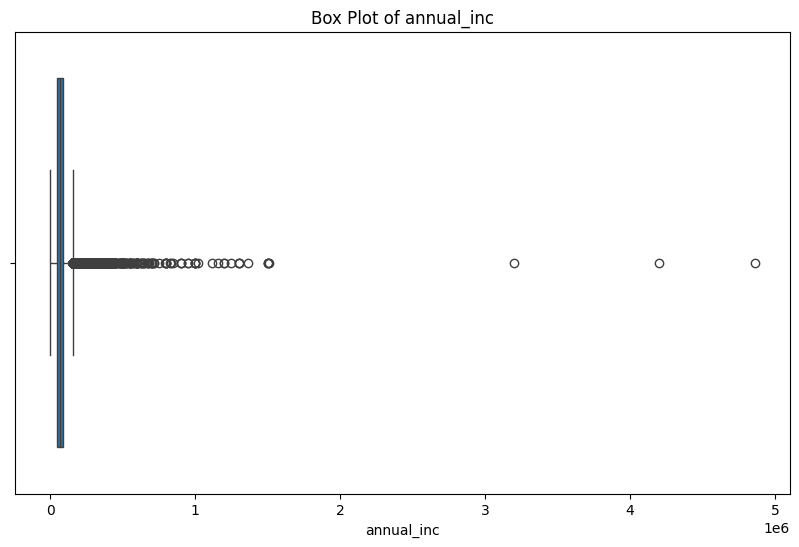

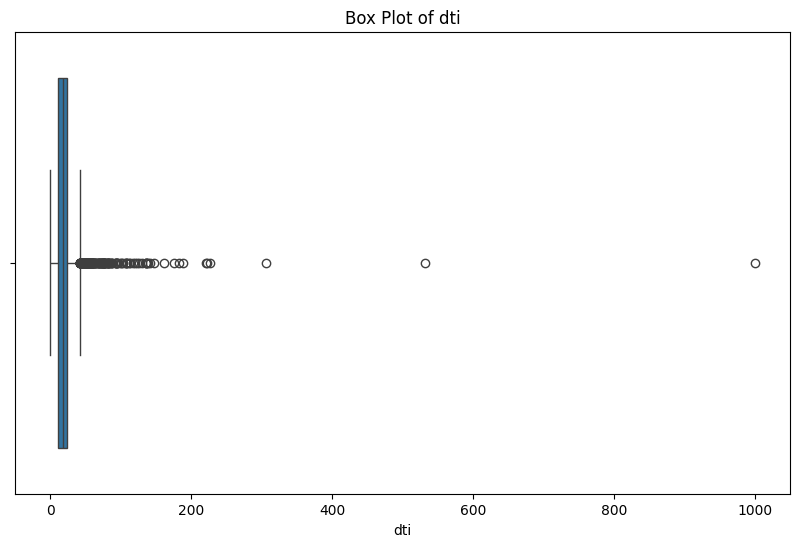

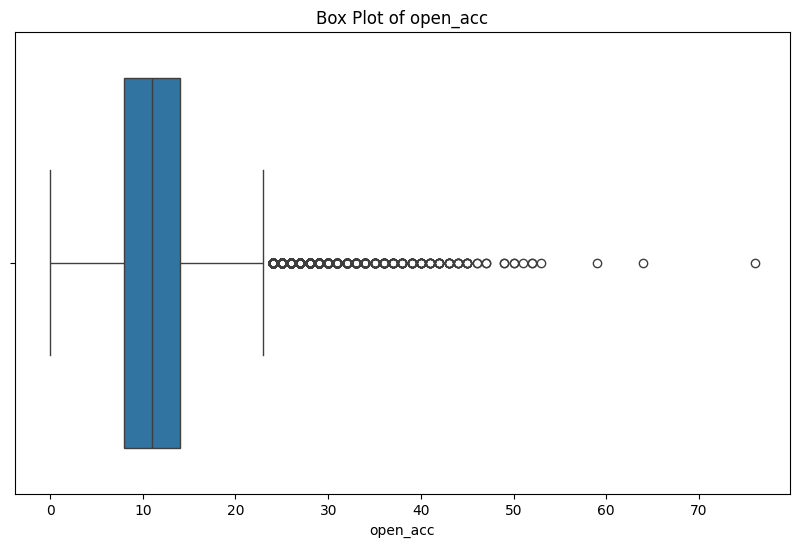

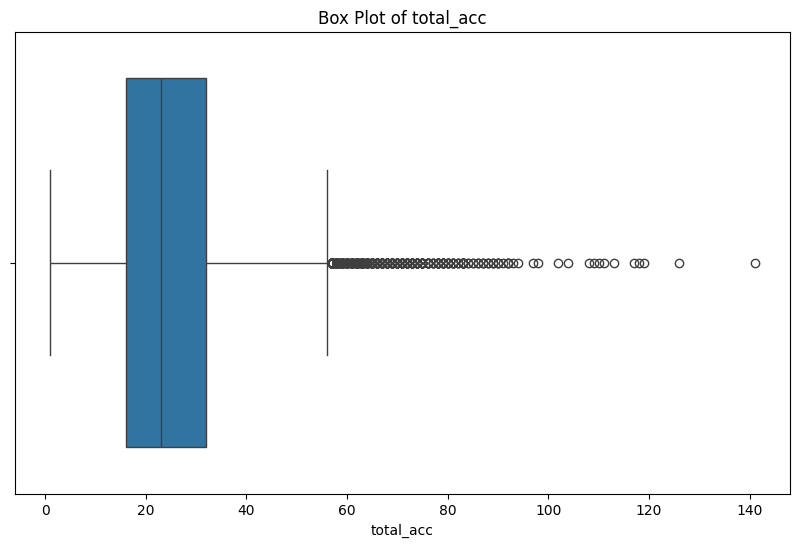

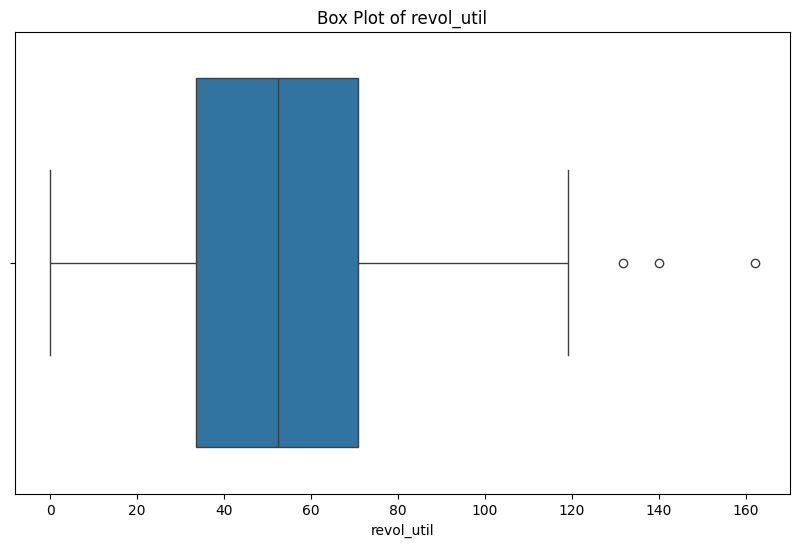

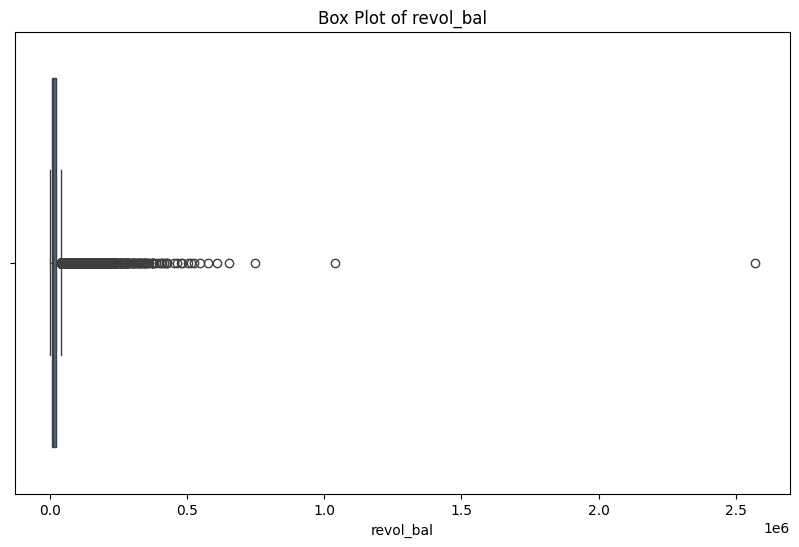

In [76]:
columns_to_plot = ['annual_inc', 'dti', 'open_acc','total_acc', 'revol_util', 'revol_bal']

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=fillna_df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [77]:
RemoveOutlier_df = fillna_df.copy()

In [78]:
print("Dataset before removing outlier:",RemoveOutlier_df.shape)

Dataset before removing outlier: (61178, 99)


In [79]:
RemoveOutlier_df[RemoveOutlier_df['annual_inc'] > 250000]['loan_condition'].value_counts()

loan_condition
Good Loan    531
Bad Loan      99
Name: count, dtype: int64

In [80]:
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['annual_inc'] <= 250000]

In [81]:
#RemoveOutlier_df[RemoveOutlier_df['dti'] > 80]

In [82]:
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['dti'] <= 50]

In [83]:
RemoveOutlier_df[RemoveOutlier_df['open_acc'] > 40]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition,emp_length_int,region
4779,16000.0,16000.0,16000.000000,36 months,9.71,514.10,B,B1,RENT,79000.0,...,10669.0,93900.0,0.0,N,Cash,N,0,Good Loan,6.0,NorthEast
7792,8500.0,8500.0,8500.000000,36 months,12.29,283.51,C,C1,MORTGAGE,82800.0,...,185409.0,10000.0,168526.0,N,Cash,N,0,Good Loan,10.0,MidWest
10483,8000.0,8000.0,8000.000000,36 months,14.49,275.33,C,C4,RENT,32000.0,...,170750.0,11500.0,159594.0,N,Cash,N,1,Bad Loan,1.0,SouthEast
10794,40000.0,40000.0,40000.000000,60 months,12.61,902.16,C,C1,MORTGAGE,140000.0,...,84682.0,231400.0,47925.0,N,Cash,N,0,Good Loan,2.0,SouthEast
10984,30000.0,30000.0,30000.000000,36 months,10.49,974.94,B,B2,MORTGAGE,165000.0,...,132970.0,10000.0,161301.0,N,Cash,N,0,Good Loan,5.0,SouthWest
11405,5700.0,5700.0,5700.000000,36 months,10.41,185.03,B,B3,RENT,60000.0,...,168212.0,10900.0,141931.0,N,Cash,N,0,Good Loan,0.5,SouthWest
11478,35000.0,35000.0,35000.000000,36 months,11.47,1153.67,B,B5,RENT,245524.0,...,171791.0,211800.0,35988.0,N,Cash,N,0,Good Loan,10.0,SouthEast
12480,20150.0,20150.0,20150.000000,60 months,17.86,510.15,D,D5,MORTGAGE,55000.0,...,27481.0,60800.0,17043.0,N,Cash,N,1,Bad Loan,10.0,SouthEast
12992,8000.0,8000.0,8000.000000,36 months,6.99,246.99,A,A2,MORTGAGE,200000.0,...,2892.0,323000.0,0.0,N,Cash,N,0,Good Loan,4.0,SouthEast
13065,6000.0,6000.0,5603.390000,36 months,7.68,187.14,A,A2,OWN,75000.0,...,0.0,0.0,0.0,N,Cash,N,0,Good Loan,10.0,NorthEast


In [84]:
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['open_acc'] <= 40]

In [85]:
RemoveOutlier_df[RemoveOutlier_df['total_acc'] > 80]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition_int,loan_condition,emp_length_int,region
423,6000.0,6000.0,6000.0,36 months,12.74,201.42,C,C1,OWN,100000.0,...,48204.0,4800.0,62218.0,N,Cash,N,0,Good Loan,3.0,SouthWest
2182,10000.0,10000.0,10000.0,36 months,6.97,308.64,A,A3,MORTGAGE,87000.0,...,157099.0,10500.0,151687.0,N,Cash,N,0,Good Loan,9.0,SouthWest
9420,6000.0,6000.0,6000.0,36 months,8.67,189.88,B,B1,MORTGAGE,114000.0,...,35902.0,51000.0,24092.0,N,Cash,N,0,Good Loan,10.0,SouthWest
10072,6000.0,6000.0,6000.0,36 months,11.99,199.26,C,C1,MORTGAGE,75000.0,...,65604.0,8000.0,86904.0,N,Cash,N,0,Good Loan,10.0,MidWest
10201,8000.0,8000.0,8000.0,36 months,14.33,274.71,C,C5,RENT,63000.0,...,57279.0,13400.0,62804.0,N,Cash,N,0,Good Loan,10.0,SouthEast
10869,7200.0,7200.0,7200.0,36 months,16.14,253.63,C,C4,MORTGAGE,89844.0,...,133624.0,18100.0,89603.0,N,Cash,N,0,Good Loan,10.0,SouthEast
11343,24000.0,24000.0,24000.0,60 months,24.50,697.42,F,F3,MORTGAGE,96000.0,...,56724.0,300.0,50660.0,N,Cash,N,0,Good Loan,7.0,SouthWest
14452,11500.0,11500.0,10375.0,36 months,10.38,373.13,B,B1,RENT,125000.0,...,0.0,0.0,0.0,N,Cash,N,0,Good Loan,4.0,West
15194,6500.0,6500.0,6500.0,36 months,17.57,233.60,D,D4,MORTGAGE,158000.0,...,135294.0,18300.0,131254.0,N,Cash,N,0,Good Loan,9.0,SouthWest
15271,7000.0,7000.0,7000.0,36 months,19.24,257.45,E,E2,RENT,45000.0,...,230058.0,20000.0,221140.0,N,Cash,Y,1,Bad Loan,0.5,SouthEast


In [86]:
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['total_acc'] <= 80]

In [87]:
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['revol_util'] <= 120]

In [88]:
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['revol_bal'] <= 250000]

In [89]:
RemoveOutlier_df.reset_index(drop=True, inplace=True)

In [90]:
print("Dataset after removing outlier:",RemoveOutlier_df.shape)

Dataset after removing outlier: (60253, 99)


In [91]:
RemoveOutlier_df.head().transpose()

,0,1,2,3,4
loan_amnt,28000.0,10650.0,3975.0,15000.0,8000.0
funded_amnt,28000.0,10650.0,3975.0,15000.0,8000.0
funded_amnt_inv,28000.0,10650.0,3975.0,15000.0,8000.0
term,36 months,36 months,36 months,36 months,36 months
int_rate,6.62,25.11,17.99,6.24,9.67
...,...,...,...,...,...
debt_settlement_flag,N,N,N,N,N
loan_condition_int,0,0,0,0,0
loan_condition,Good Loan,Good Loan,Good Loan,Good Loan,Good Loan
emp_length_int,10.0,10.0,2.0,8.0,10.0


## Correlation Analysis

In [ ]:
#print(corr_df.columns.tolist())

In [93]:
target_variable = "loan_condition_int"

In [ ]:
target_col

In [95]:
corr_df = RemoveOutlier_df

In [96]:
print(corr_df['loan_condition_int'].dtype)

int32


In [97]:
corr_df['loan_condition_int'] = corr_df['loan_condition_int'].astype('int64')

In [98]:
target_variable = 'loan_condition_int'
correlation_with_loan_condition = corr_df.select_dtypes(include=['int64', 'float64']).corr()[target_variable]
sorted_correlation = correlation_with_loan_condition.drop(target_variable).sort_values(ascending=False)

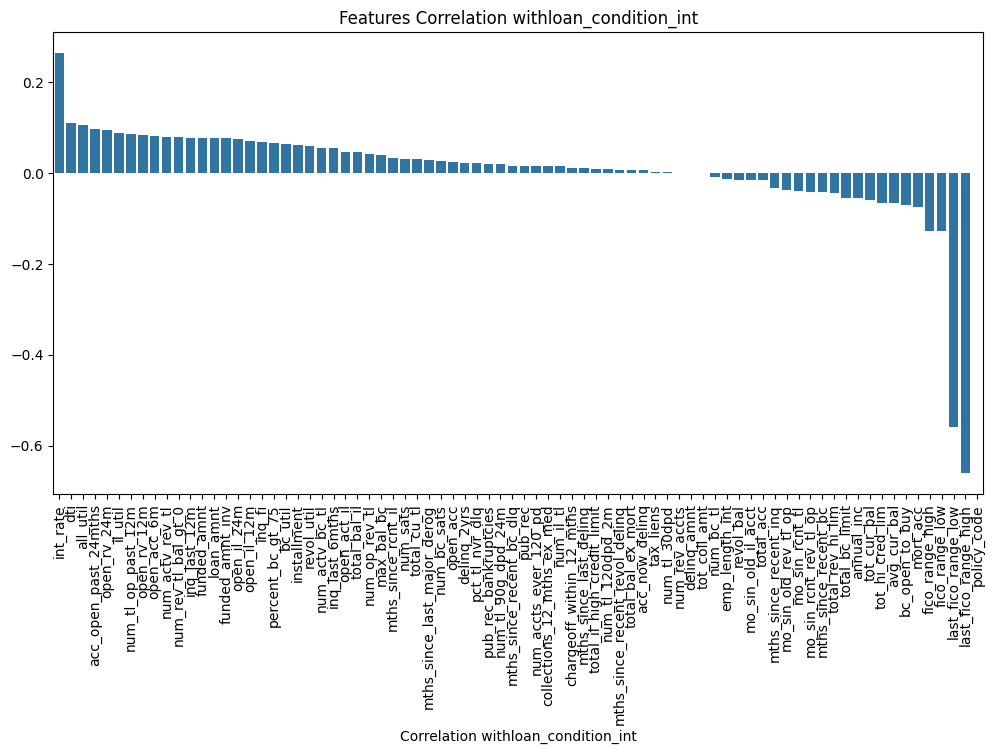

int_rate                0.263249
dti                     0.108784
all_util                0.104183
acc_open_past_24mths    0.095598
open_rv_24m             0.095068
                          ...   
fico_range_high        -0.127440
fico_range_low         -0.127441
last_fico_range_low    -0.559323
last_fico_range_high   -0.660207
policy_code                  NaN
Name: loan_condition_int, Length: 78, dtype: float64


In [99]:
# plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values, orient='v')
plt.xlabel('Correlation with{}'.format(target_variable))
plt.title('Features Correlation with{}'.format(target_variable))
plt.xticks(rotation=90)
plt.show()
print(sorted_correlation)

In [100]:
sorted_correlation.to_list()

[0.2632487833057987,
 0.10878350202448735,
 0.10418333180826911,
 0.0955975189088078,
 0.09506820285166973,
 0.08660617401025396,
 0.08444379388293344,
 0.08420458710389485,
 0.08119435308091147,
 0.07848247462936629,
 0.07793592645156126,
 0.07680761075125415,
 0.07675659147640396,
 0.07664706714882609,
 0.07632564094792467,
 0.07346980652092328,
 0.06929678589773652,
 0.06677505275984068,
 0.06503858254189274,
 0.06309697039206931,
 0.06107463053029191,
 0.058345354488767535,
 0.05439576223477215,
 0.053585171395589076,
 0.04656941550339082,
 0.04615050934520323,
 0.040898021033369314,
 0.03829432449890373,
 0.03147200798426592,
 0.031141051858085814,
 0.02994202833910385,
 0.02878999957339835,
 0.026631990598747834,
 0.022752551573108647,
 0.022268142362862387,
 0.02166802733783374,
 0.01958115635251444,
 0.018408969749093066,
 0.015500254687782421,
 0.015279273698323268,
 0.015145479353622407,
 0.0146396272982463,
 0.014483707239760654,
 0.009939024666042904,
 0.00979821982347036,


In [101]:
# Select the variables with the highest correlation with the dependent variable and explore the correlation between them
top_variables = sorted_correlation.abs().nlargest(10).index.tolist()

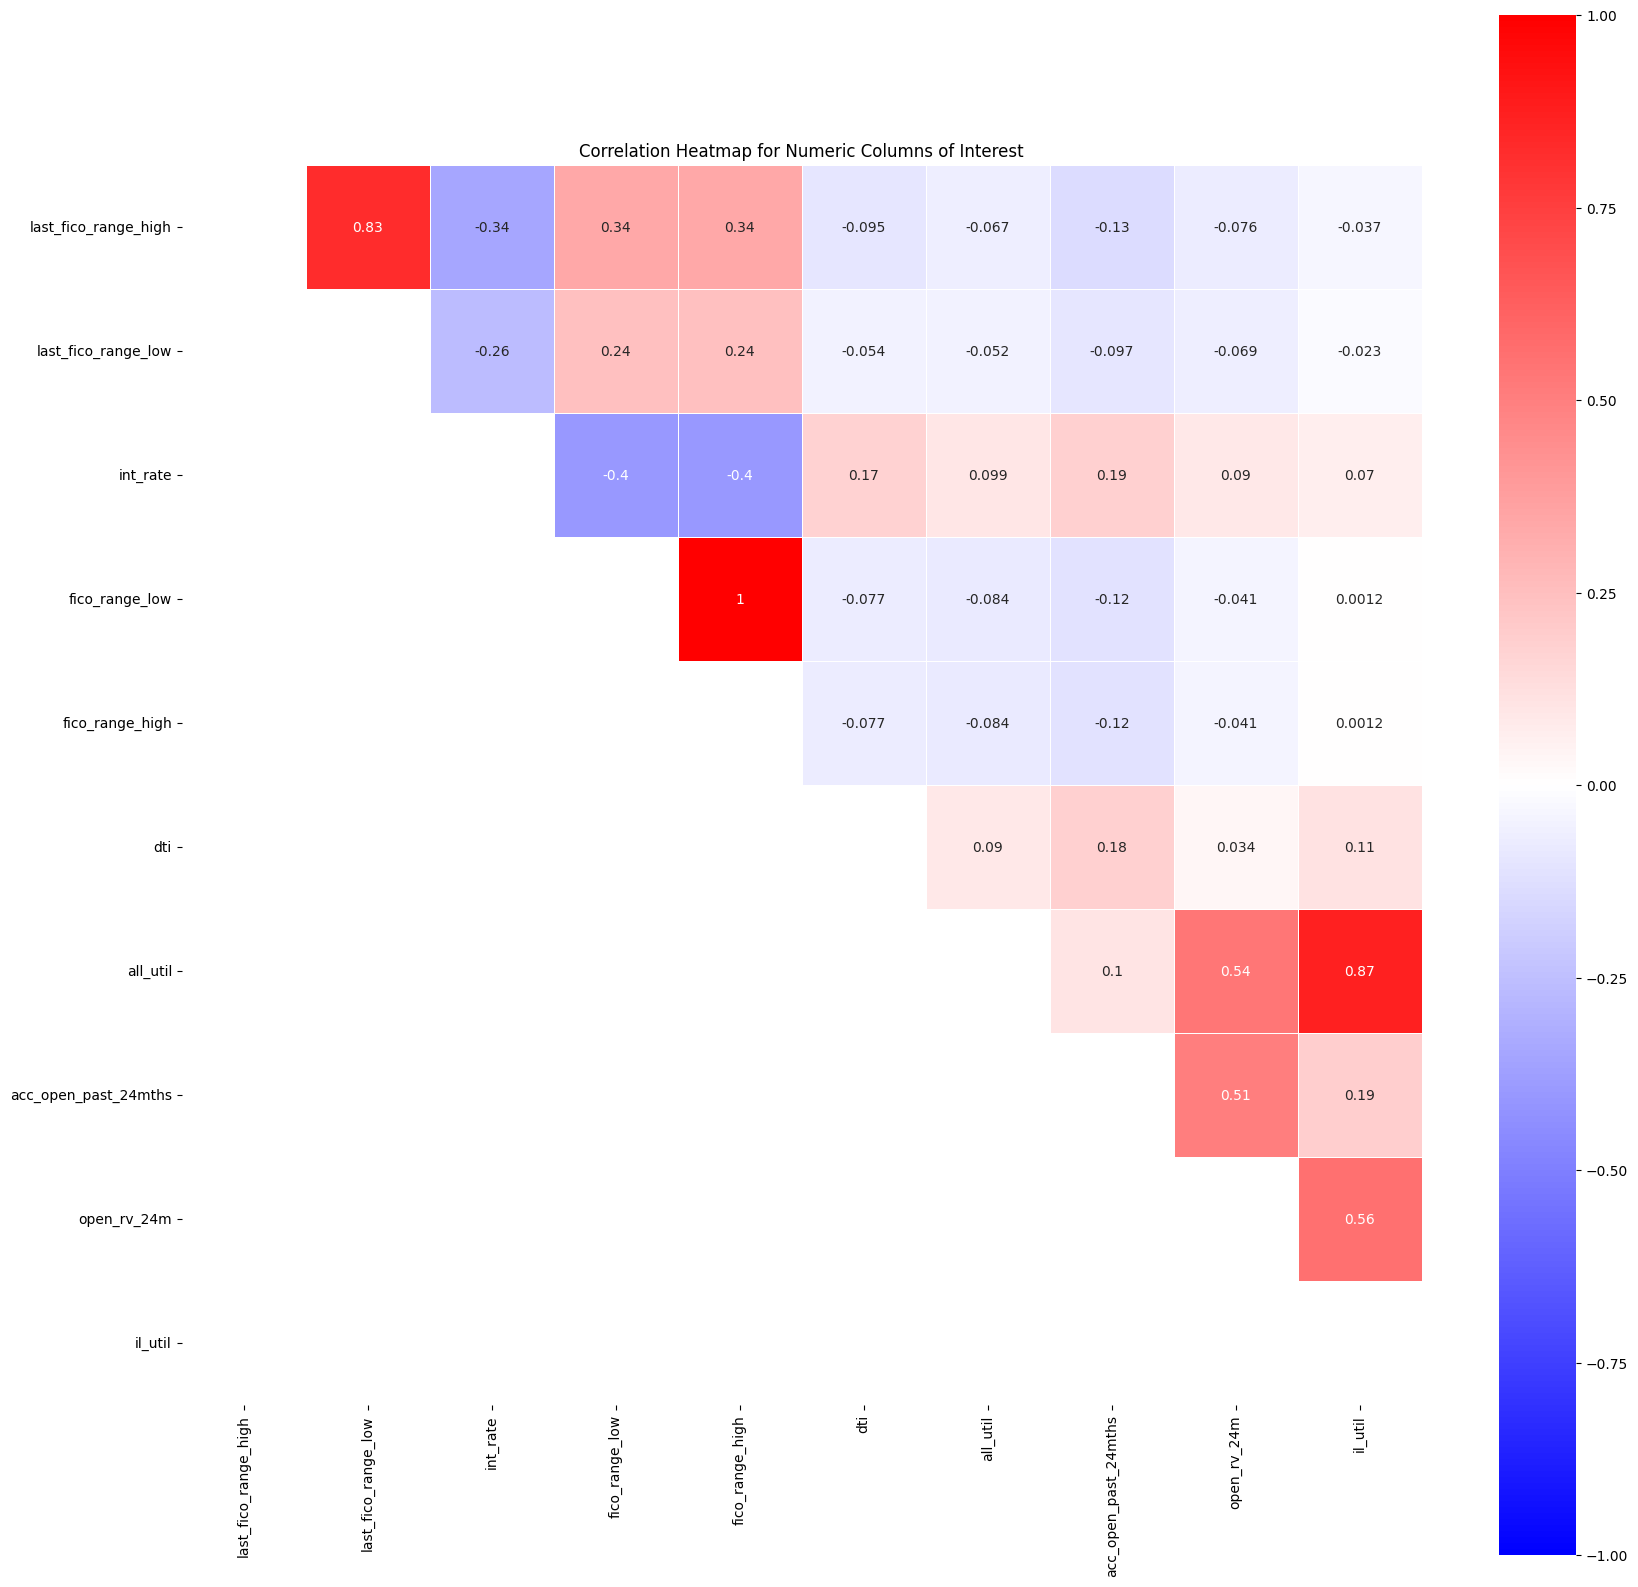

In [102]:
plt.figure(figsize=(20, 20))
correlation_matrix = RemoveOutlier_df[top_variables].corr()
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='bwr', vmin=-1, vmax=1, square=True, linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap for Numeric Columns of Interest')
plt.show()

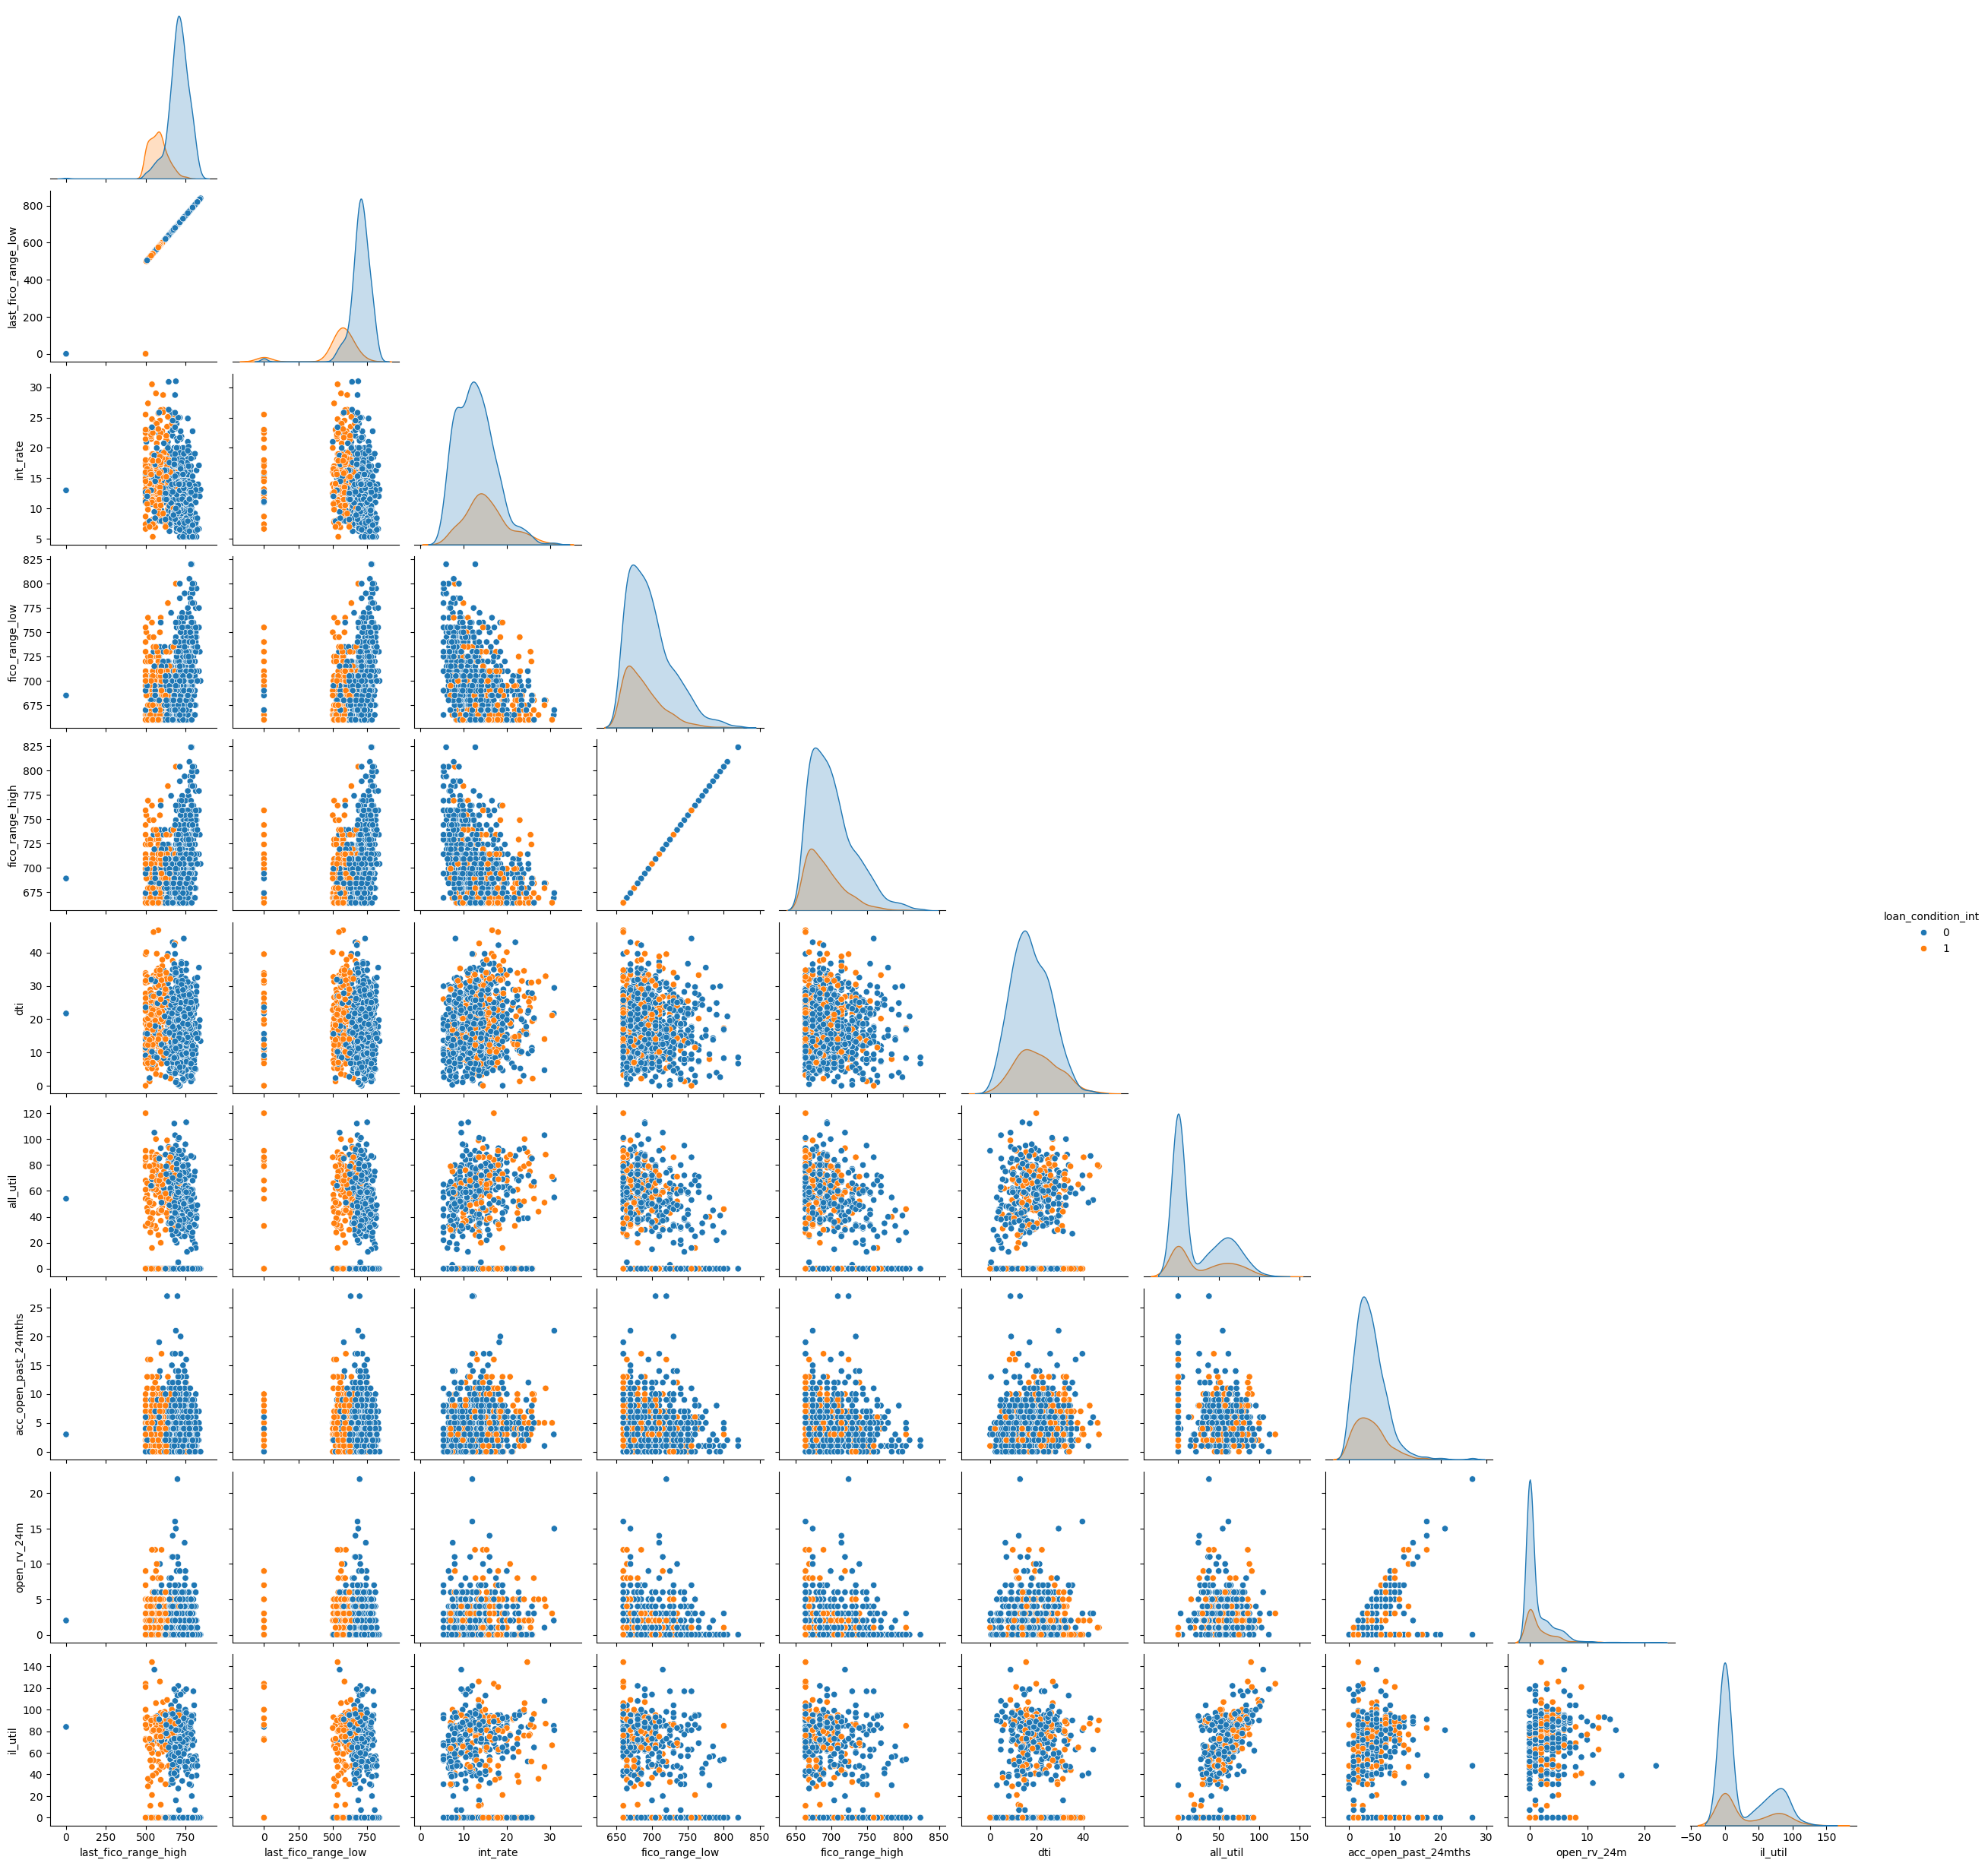

In [103]:
# # Further, explore the specific distribution of the relationship between variables under the action of the dependent variable loan_condition_int
# # This runs a bit slowly, so run with caution
sample_corr_df = corr_df[top_variables + [target_variable]].sample(n=1000, random_state=42)
sns.pairplot(sample_corr_df,hue=target_variable, diag_kind='kde',corner=True)

## Feature Engineering

In [104]:
TE_df = RemoveOutlier_df.copy()

In [105]:
# divide variables into numerical variables and categorical variables, categorical variables are divided into binary variables and multivariate variables
original_cols = TE_df.columns

In [106]:
cat_cols = TE_df.select_dtypes(include=['object']).columns.tolist()

In [107]:
cat_cols

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 'loan_condition',
 'region']

In [108]:
num_cols = [col for col in TE_df.select_dtypes(exclude=['object']).columns.tolist() if col not in ['id', 'loan_condition_int']]

In [109]:
num_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mth

In [110]:
dual_cat_cols = [col for col in cat_cols if TE_df[col].nunique()<=2]

In [111]:
multi_cat_cols =[col for col in cat_cols if TE_df[col].nunique()>2]

In [112]:
dual_cat_cols

['term',
 'pymnt_plan',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 'loan_condition']

In [113]:
multi_cat_cols

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d',
 'region']

In [114]:
# pair all categorical features with another categorical feature
import itertools
def combine_categories(dataframe, cat_cols, expand_dim=False):
    df = dataframe.copy()
    combined = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combined:
        df.loc[:, f'{c1}__{c2}'] = df[c1].astype(str) + '_' + df[c2].astype(str)
        if expand_dim:
            cat_cols.append(f'{c1}__{c2}')
    return df, cat_cols


In [115]:
# binary encoding for dual_cat_cols
TE_df = pd.get_dummies(TE_df, columns=dual_cat_cols, drop_first=True)

# update dual_cat_cols
changed_columns = [col for col in TE_df.columns if col not in original_cols]
dual_cat_cols = changed_columns

TE_df.head().transpose()

,0,1,2,3,4
loan_amnt,28000.0,10650.0,3975.0,15000.0,8000.0
funded_amnt,28000.0,10650.0,3975.0,15000.0,8000.0
funded_amnt_inv,28000.0,10650.0,3975.0,15000.0,8000.0
int_rate,6.62,25.11,17.99,6.24,9.67
installment,859.71,424.07,143.69,457.97,256.9
...,...,...,...,...,...
application_type_Joint App,False,False,False,False,False
hardship_flag_Y,False,False,False,False,False
disbursement_method_DirectPay,False,False,False,False,False
debt_settlement_flag_Y,False,False,False,False,False


In [116]:
from sklearn.model_selection import StratifiedShuffleSplit

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [119]:
target_variable = "loan_condition_int"

In [120]:
for train_index, test_index in stratified.split(TE_df, TE_df[target_variable]):
    stratified_train = TE_df.loc[train_index]
    stratified_test = TE_df.loc[test_index]

In [121]:
train_df = stratified_train
test_df = stratified_test

In [122]:
# Let's Shuffle the data
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [123]:
target_col = "loan_condition_int"

In [124]:
print(train_df[target_col].value_counts()/len(TE_df))
print(test_df[target_col].value_counts()/len(TE_df))
train_df.shape

loan_condition_int
0    0.625098
1    0.174896
Name: count, dtype: float64
loan_condition_int
0    0.156291
1    0.043716
Name: count, dtype: float64


(48202, 99)

In [125]:
# separates the y(target variables) and X(features) for the training and testing datasets

train_y = train_df[[target_col]]
test_y = test_df[[target_col]]

In [126]:
train_X = train_df.drop(target_col, axis=1, inplace=False)

In [127]:
train_X.shape

(48202, 98)

In [128]:
test_X = test_df.drop(target_col, axis=1, inplace=False)

In [129]:
test_X.shape

(12051, 98)

## Target Encoding for Multicategorical Variables

In [130]:
# Create a data set containing only multi-categorical variables
multi_cat_train_X = train_X[multi_cat_cols]
multi_cat_test_X = test_X[multi_cat_cols]

In [131]:
from category_encoders import LeaveOneOutEncoder

In [134]:
from category_encoders import TargetEncoder

In [135]:
# Target encode categorical variables with smoothing method (on train set)
encoder = TargetEncoder(smoothing=0.2)
encoder.fit(multi_cat_train_X, train_y)

,verbose,0
,cols,"['grade', 'sub_grade', ...]"
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,min_samples_leaf,20
,smoothing,0.2
,hierarchy,None


In [136]:
# Apply the same encoding rules on train and test set
encoded_multi_cat_train_X = encoder.transform(multi_cat_train_X)
encoded_multi_cat_test_X = encoder.transform(multi_cat_test_X)

In [137]:
encoded_train_X = pd.concat([train_X.drop(columns=multi_cat_cols), encoded_multi_cat_train_X], axis=1)
encoded_test_X = pd.concat([test_X.drop(columns=multi_cat_cols), encoded_multi_cat_test_X], axis=1)

In [138]:
encoded_train_X.head().transpose()

,0,1,2,3,4
loan_amnt,20000.0,23800.0,8000.0,19200.0,6000.0
funded_amnt,20000.0,23800.0,8000.0,19200.0,6000.0
funded_amnt_inv,20000.0,23525.0,8000.0,19200.0,6000.0
int_rate,5.32,30.79,9.75,12.99,12.79
installment,602.3,781.6,257.2,436.77,201.56
...,...,...,...,...,...
addr_state,0.183303,0.214724,0.241659,0.240169,0.210497
earliest_cr_line,0.342466,0.247573,0.294118,0.212698,0.21875
last_pymnt_d,0.182247,0.227578,0.229738,0.198529,0.259219
last_credit_pull_d,0.182039,0.144928,0.196957,0.196957,0.114973


## Normalization for Numeric Variables

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [142]:
# Fit and apply normalization on the training set
standardized_train_X = encoded_train_X.copy()
standardized_train_X[num_cols] = scaler.fit_transform(encoded_train_X[num_cols])

In [143]:
# Apply the same normalization rules on the test set
standardized_test_X = encoded_test_X.copy()
standardized_test_X[num_cols] = scaler.transform(encoded_test_X[num_cols])

In [144]:
standardized_train_X.head().transpose()

,0,1,2,3,4
loan_amnt,0.654422,1.094802,-0.736249,0.561711,-0.968027
funded_amnt,0.655446,1.096001,-0.735781,0.562697,-0.967652
funded_amnt_inv,0.658057,1.066427,-0.732138,0.565377,-0.963837
int_rate,-1.681286,3.667296,-0.751007,-0.070622,-0.112621
installment,0.641749,1.334327,-0.691262,0.002359,-0.906182
...,...,...,...,...,...
addr_state,0.183303,0.214724,0.241659,0.240169,0.210497
earliest_cr_line,0.342466,0.247573,0.294118,0.212698,0.21875
last_pymnt_d,0.182247,0.227578,0.229738,0.198529,0.259219
last_credit_pull_d,0.182039,0.144928,0.196957,0.196957,0.114973


# Dealing with Imbalanced Dataset

In [149]:
from imblearn.under_sampling import RandomUnderSampler

In [150]:
undersampler = RandomUnderSampler(random_state=42)

In [151]:
# Undersampling the training set
standardized_train_X_undersample, train_y_undersample = undersampler.fit_resample(standardized_train_X, train_y) 

In [152]:
print('standardized_train_X_undersample.shape',standardized_train_X_undersample.shape)

standardized_train_X_undersample.shape (21076, 98)


In [153]:
pd.value_counts(train_y_undersample.loan_condition_int).to_frame()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14316\4002212102.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_y_undersample.loan_condition_int).to_frame()


,count
loan_condition_int,
0,10538
1,10538


# Feature Selection

In [155]:
from sklearn.feature_selection import VarianceThreshold

In [156]:
selector = VarianceThreshold(threshold=1)
selector.fit(standardized_train_X_undersample)

,threshold,1


In [157]:
filtered_feature_names = standardized_train_X_undersample.columns[selector.get_support()]
standardized_train_X_undersample_filtered = standardized_train_X_undersample[filtered_feature_names]

In [158]:
standardized_train_X_undersample_filtered.shape

(21076, 48)

In [159]:
to_wrap_train_X = standardized_train_X_undersample_filtered.copy()
train_y = train_y_undersample.copy()

In [160]:
nfeatures = len(to_wrap_train_X.columns)
nfeatures

48

In [161]:
vars_final = ['delinq_2yrs',
 'last_fico_range_high',
 'last_fico_range_low',
 'acc_now_delinq',
 'open_acc_6m',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'all_util']

In [162]:
# %%time
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

# nfeatures = len(to_wrap_train_X.columns)
# clf = RandomForestClassifier(n_estimators=5, n_jobs=-1)
# sfs = SFS(clf, k_features=nfeatures, forward=True, verbose=2, cv=2, n_jobs=-1)
# sfs.fit(to_wrap_train_X, train_y)

# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# vars_FS = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
# vars_FS

In [163]:
# vars_final = list(vars_FS.loc[15, 'feature_names'])
# vars_final

In [164]:
# fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev', figsize=(8, 5))
# plt.xticks(np.arange(0, len(to_wrap_train_X.columns), step=5))

# # plt.ylim([0.9, 1.0])
# plt.xlim(0,len(to_wrap_train_X.columns))
# plt.title('Stepwise Selection')
# plt.grid()
# plt.show()

In [165]:
# Use wrapper to reduce variables
wrapped_train_X = to_wrap_train_X.filter(vars_final, axis=1)
wrapped_test_X = standardized_test_X.filter(vars_final, axis=1)

In [166]:
print("final train/test X shape (target encoded):", wrapped_train_X.shape, wrapped_test_X.shape)
print("final train/test y shape:", train_y.shape, test_y.shape)

final train/test X shape (target encoded): (21076, 9) (12051, 9)
final train/test y shape: (21076, 1) (12051, 1)


In [167]:
wrapped_train_X.head()

,delinq_2yrs,last_fico_range_high,last_fico_range_low,acc_now_delinq,open_acc_6m,total_bal_il,il_util,open_rv_12m,all_util
23123,-0.363123,1.271319,0.877672,-0.066139,-0.459917,-0.456882,-0.685557,-0.472138,-0.751800
15637,-0.363123,0.657218,0.501886,-0.066139,0.622233,0.226834,0.677259,1.970405,0.356017
47790,-0.363123,0.657218,0.501886,-0.066139,-0.459917,-0.456882,-0.685557,-0.472138,-0.751800
28352,-0.363123,1.209909,0.840094,-0.066139,-0.459917,-0.456882,-0.685557,-0.472138,-0.751800
5869,-0.363123,0.288757,0.276414,-0.066139,-0.459917,-0.456882,-0.685557,-0.472138,-0.751800


#  Model Building

### 🔹 Models Used
- **Logistic Regression**
- **Decision Tree**
- **K-Nearest Neighbors (KNN)**
- **Random Forest**
- **Gaussian Naive Bayes**
- **LightGBM**
- **XGBoost**
- **Gradient Boosting**
- **Neural Network**

---

### 🔹 Validation Strategy
We used **5-Fold Cross Validation** to evaluate model performance.  
- The dataset was split into 5 subsets.  
- Each model was trained on 4 folds and tested on the remaining fold.  
- This process was repeated 5 times, and the average accuracy was reported.  
ng training.

In [168]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [169]:
def plot_confusion_matrix(mean_conf_matrix, xtick_labels=None, ytick_labels=None):
    fig, axes = plt.subplots(figsize=(8, 6))
    default_style = sns.axes_style()
    # sns.set(font_scale=1.5)
    ax = sns.heatmap(mean_conf_matrix.T, annot=True, cmap='Blues', fmt=".1f",annot_kws={"size": 18})
    if xtick_labels:
        ax.set_xticklabels(xtick_labels)
    if ytick_labels:
        ax.set_yticklabels(ytick_labels)


    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    ax.axis('equal')
    plt.title('Mean Confusion Matrix')
    sns.set_style(default_style)
    plt.show()

In [170]:
def calculate_scores(model, X_trn, y_trn, X_tst, y_tst):
    """Calculate various classification scores on the test set"""
    model.fit(X_trn, y_trn)
    y_pred = model.predict(X_tst)
    accuracy = accuracy_score(y_tst, y_pred)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_tst, y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_tst, y_pred)
    recall = recall_score(y_tst, y_pred)
    f1 = f1_score(y_tst, y_pred)

    y_pred_proba = model.predict_proba(X_tst)[:,1]
    auc = roc_auc_score(y_tst, y_pred_proba)

    mask = y_tst['loan_condition_int'].astype(bool).values
    churn = y_pred_proba[mask]
    not_churn = y_pred_proba[~mask]
    ks = sps.ks_2samp(churn, not_churn)[0]

    return accuracy, auc, ks, conf_matrix, precision, recall, f1

In [171]:
def fit_first_level(models, X_trn, y_trn, X_tst):
    """
    Prepare first-level model fitting for stacking. Only used during model stacking.
    Output the predicted probabilities of the first-level models as features for the stacking model.
    """
    # Create dataframes to store predictions of the first-level models
    X2_trn = np.zeros((len(X_trn), 2 * len(models)))
    X2_tst = np.zeros((len(X_tst), 2 * len(models)))

    for i, model in enumerate(models.values()):
        print("Stacking with", model)

        model.fit(X_trn, y_trn)
        y_trn_pred_proba = model.predict_proba(X_trn)
        y_tst_pred_proba = model.predict_proba(X_tst)

        X2_trn[:, i*2:(i+1)*2] = y_trn_pred_proba
        X2_tst[:, i*2:(i+1)*2] = y_tst_pred_proba

    return X2_trn, X2_tst

In [172]:
def calculate_cv_scores(model, X, y, cv=5, stacking=False, models=None, verbose=False):
    """Calculate average k-fold cross-validated classification scores"""
    kf = KFold(n_splits=cv, shuffle=True)
    accuracy_scores = []
    auc_scores = []
    ks_scores = []
    conf_matrices = []  # Store confusion matrices for each fold
    precision_scores = []
    recall_scores = []
    f1_scores = []
    fold_count = 0

    for train_index, test_index in kf.split(X):
        X_trn, X_tst = X.iloc[train_index], X.iloc[test_index]
        y_trn, y_tst = y.iloc[train_index], y.iloc[test_index]

        if stacking:
            # smote = False
            X_trn, X_tst = fit_first_level(models, X_trn, y_trn, X_tst)

        accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(model, X_trn, y_trn, X_tst, y_tst)
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        ks_scores.append(ks)
        conf_matrices.append(conf_matrix)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # if verbose:
        #     print(f"Fold {fold_count} accuracy, auc, ks:", accuracy, auc, ks)

        fold_count += 1

    # mean confusion matrix
    mean_conf_matrix = np.mean(conf_matrices, axis=0) #/ np.sum(np.mean(conf_matrices, axis=0)))
    print(f"Mean Confusion Matrix for Model:\n", mean_conf_matrix)
    plot_confusion_matrix(mean_conf_matrix, xtick_labels=['Good Loan', 'Bad Loan'], ytick_labels=['Good Loan', 'Bad Loan'])

    return np.mean(accuracy_scores), np.mean(auc_scores), np.mean(ks_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)

In [173]:
def fit_models_summary(models, X, y, cv=5, smote = False,undersample = False):
    """
    Calculate average k-fold cross-validated classification scores for multiple models.
    Generate a summary dataframe.
    """
    baseline = pd.DataFrame(columns=['accuracy', 'auc', 'ks', 'precision', 'recall', 'f1'])

    for name, model in models.items():
        # accuracy, auc, ks, precision, recall, f1 = calculate_cv_scores(model, X, y, cv=cv, smote=False)
        # baseline.loc[name] = [accuracy, auc, ks, None, precision, recall, f1]

        accuracy, auc, ks, precision, recall, f1 = calculate_cv_scores(model, X, y, cv=cv)

        if smote:
            baseline.loc["{} (SMOTE)".format(name)] = [accuracy, auc, ks, precision, recall, f1]
        if undersample:
            baseline.loc["{} (undersample)".format(name)] = [accuracy, auc, ks, precision, recall, f1]

        print(f"{name} processed")

    return baseline

In [174]:
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import VarianceThreshold

In [ ]:
import sys
!{sys.executable} -m pip install lightgbm

In [178]:
# Classifiers
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [179]:
from sklearn.ensemble import BaggingClassifier

In [192]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [181]:
mss=60
msl=int(mss/2)
models = {
     'Logistic Regression': LogisticRegression(),
     'Decision Tree': DecisionTreeClassifier(max_depth=10,min_samples_split=mss,min_samples_leaf=msl),
     'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=20),
     'Random Forest': RandomForestClassifier(n_estimators=20,max_depth=10),
     'Gaussian Naive Bayes': GaussianNB(var_smoothing=1),
     'Light GBM': LGBMClassifier(n_estimators=50,max_depth=3),
     'XGBoost': XGBClassifier(n_estimators=50,max_depth=3),
     'Gradient Boosting': GradientBoostingClassifier(n_estimators=50,max_depth=3),
     "Neural Network": MLPClassifier(hidden_layer_sizes = (10,10)),
# #     'Support Vector Machine': SVC()
}

In [183]:
import scipy.stats as sps

Mean Confusion Matrix for Model:
 [[1847.6  260. ]
 [ 302.2 1805.4]]


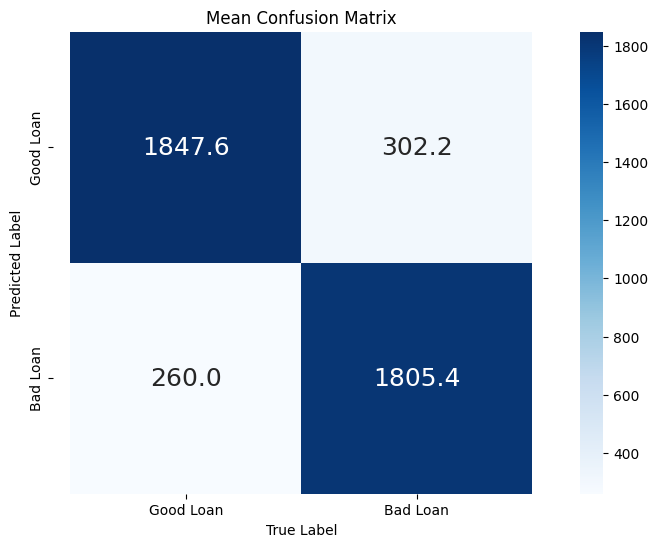

Logistic Regression processed
Mean Confusion Matrix for Model:
 [[1805.6  302. ]
 [ 261.6 1846. ]]


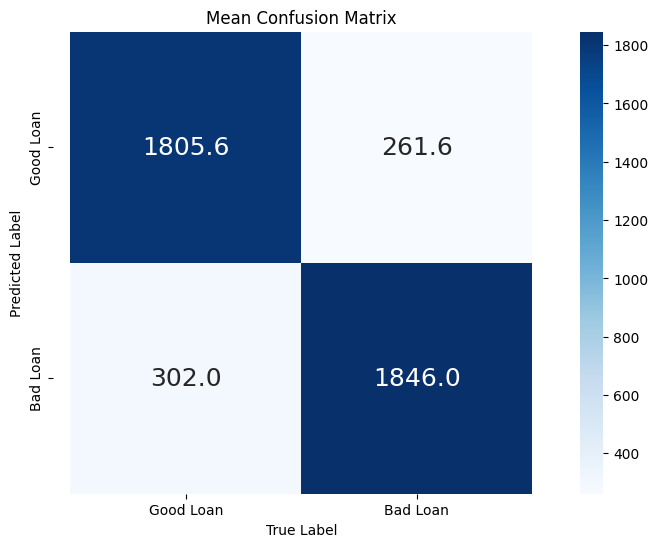

Decision Tree processed
Mean Confusion Matrix for Model:
 [[1798.8  308.8]
 [ 246.2 1861.4]]


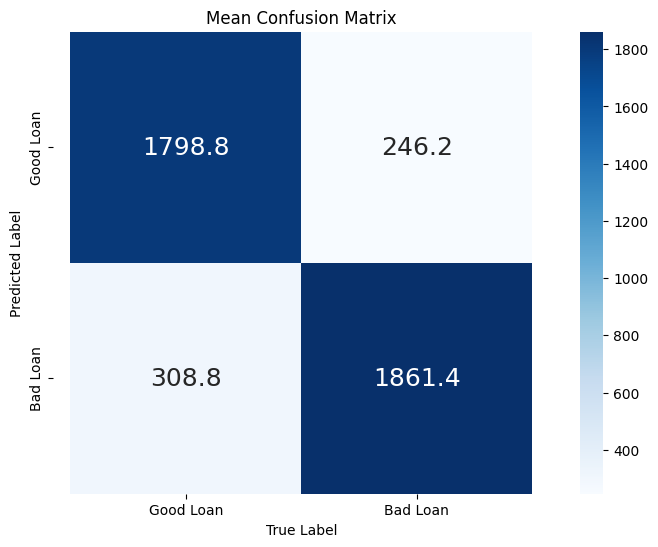

Random Forest processed
[LightGBM] [Info] Number of positive: 8467, number of negative: 8393
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 16860, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502195 -> initscore=0.008778
[LightGBM] [Info] Start training from score 0.008778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

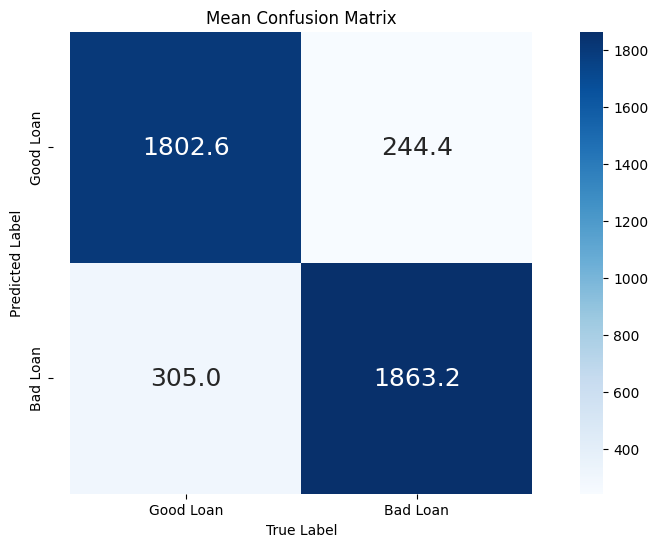

Light GBM processed
Mean Confusion Matrix for Model:
 [[1806.2  301.4]
 [ 247.6 1860. ]]


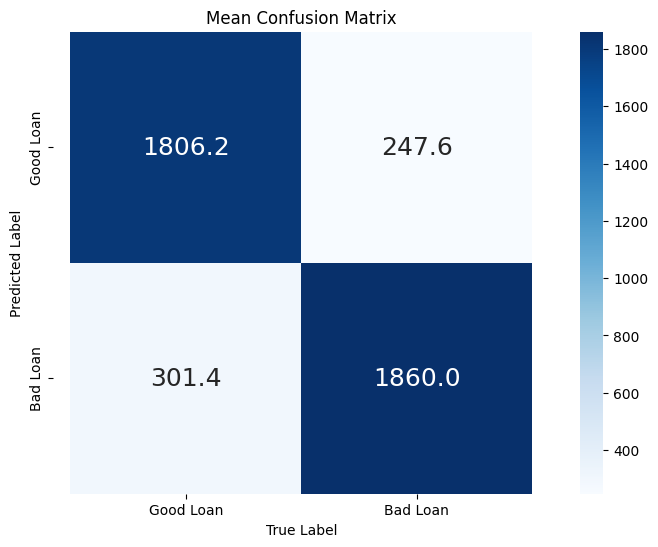

XGBoost processed
Mean Confusion Matrix for Model:
 [[1805.2  302.4]
 [ 247.4 1860.2]]


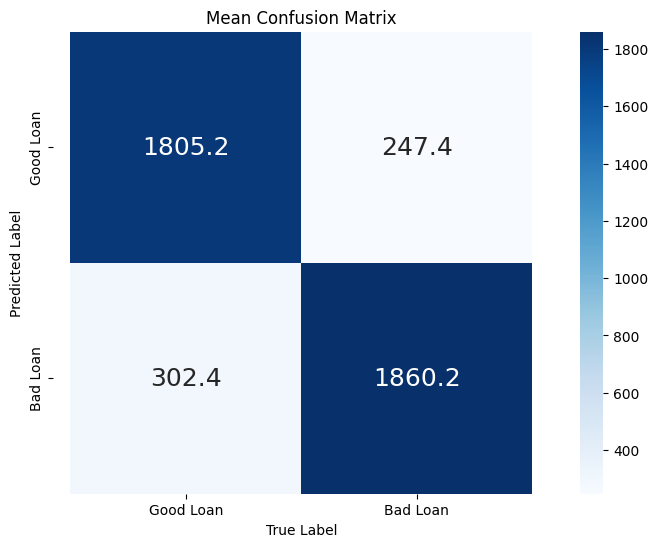

Gradient Boosting processed
Mean Confusion Matrix for Model:
 [[1800.6  307. ]
 [ 242.  1865.6]]


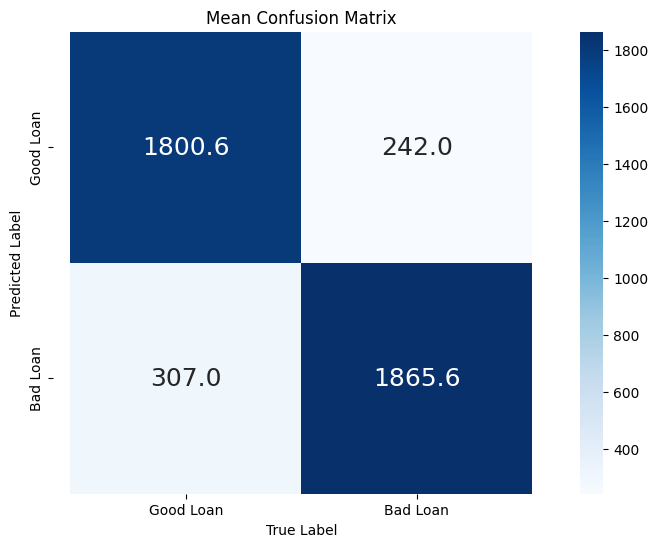

Neural Network processed


In [193]:
# test baseline models on undersampling dataset
baseline_tgt = fit_models_summary(models, wrapped_train_X, train_y, undersample=True)

In [186]:
baseline_tgt

,accuracy,auc,ks,precision,recall,f1
Logistic Regression (undersample),0.866721,0.927328,0.740360,0.874185,0.856721,0.865348
Decision Tree (undersample),0.866578,0.924931,0.739064,0.855347,0.882534,0.868707
K Nearest Neighbors (undersample),0.734959,0.772552,0.507579,0.897003,0.530870,0.666923
Random Forest (undersample),0.869093,0.928882,0.740489,0.859759,0.882110,0.870768
Gaussian Naive Bayes (undersample),0.793842,0.909235,0.682795,0.895270,0.665644,0.763420
Light GBM (undersample),0.869378,0.931312,0.743170,0.858913,0.883950,0.871245
XGBoost (undersample),0.869283,0.930308,0.743054,0.860714,0.881202,0.870816
Gradient Boosting (undersample),0.868951,0.931029,0.742718,0.860293,0.880858,0.870451
Neural Network (undersample),0.869899,0.930822,0.741971,0.860666,0.882775,0.871527


# Model Bagging and Stacking

In [199]:
models = {
     'Logistic Regression': LogisticRegression(),
     'Decision Tree': DecisionTreeClassifier(max_depth=10,min_samples_split=mss,min_samples_leaf=msl),
    #  'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=20),
     'Random Forest': RandomForestClassifier(n_estimators=20,max_depth=10),
    #  'Gaussian Naive Bayes': GaussianNB(var_smoothing=1),
     'Light GBM': LGBMClassifier(n_estimators=50,max_depth=3),
     'XGBoost': XGBClassifier(n_estimators=50,max_depth=3),
     'Gradient Boosting': GradientBoostingClassifier(n_estimators=50,max_depth=3),
     "Neural Network": MLPClassifier(hidden_layer_sizes = (10,10))
}

In [ ]:
performance_df = pd.DataFrame(columns=['accuracy', 'auc', 'ks', 'precision', 'recall', 'f1'])

bagging_models = {}
for model_name, model in models.items():
    print("processing: ", model_name)
    bagging_model = BaggingClassifier(estimator=model, n_estimators=10, random_state=42)

    # Training Bagging model
    bagging_model.fit(wrapped_train_X, train_y)

    bagging_models[model_name + '_bagging'] = bagging_model
    accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(bagging_model, wrapped_train_X, train_y, wrapped_test_X, test_y)
    performance_dict = {
        'accuracy': accuracy,
        'auc': auc,
        'ks': ks,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    performance_df.loc[model_name + ' (bagging)'] = performance_dict
    

Stacking with LogisticRegression()
Stacking with DecisionTreeClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=60)
Stacking with RandomForestClassifier(max_depth=10, n_estimators=20)
Stacking with LGBMClassifier(max_depth=3, n_estimators=50)
Stacking with XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, r

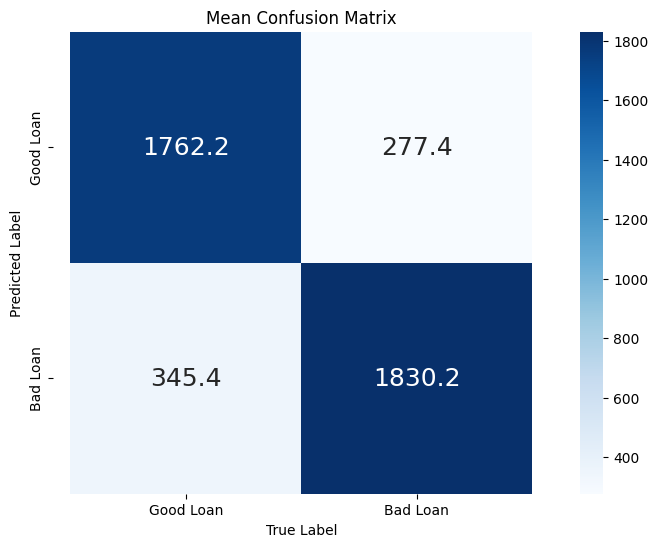

Stacking baseline:
Accuracy: 0.8522493309113337
AUC: 0.9105073210241695
recall: 0.8684335019053805


In [201]:
stack_model = XGBClassifier(max_depth = 3)
accuracy, auc, ks, precision, recall, f1 = calculate_cv_scores(stack_model, wrapped_train_X, train_y,
                                        stacking = True, models = models,
                                        verbose = True)
print('Stacking baseline:')
print('Accuracy:', accuracy)
print('AUC:', auc)
print('recall:', recall)


# Model Evaluation on Test Set

In [202]:
holdout_summary = pd.DataFrame(columns = ['accuracy','auc','ks','precision','recall','f1'])

X_trn, y_trn = wrapped_train_X, train_y

In [203]:
for name, model in models.items():
    accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(model, X_trn, y_trn, wrapped_test_X, test_y)
    holdout_summary.loc[name] = [accuracy, auc, ks, precision, recall, f1]

In [204]:
X2_trn, X2_tst = fit_first_level(models, wrapped_train_X, train_y, wrapped_test_X)

Stacking with LogisticRegression()
Stacking with DecisionTreeClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=60)
Stacking with RandomForestClassifier(max_depth=10, n_estimators=20)
Stacking with LGBMClassifier(max_depth=3, n_estimators=50)
Stacking with XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, r

In [ ]:
# add bagging model performance
for model_name, bagging_model in bagging_models.items():
    accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(bagging_model, wrapped_train_X, train_y, wrapped_test_X, test_y)
    holdout_summary.loc[model_name] = [accuracy, auc, ks, precision, recall, f1]
    

In [206]:
# add stack model performance
stack_model = XGBClassifier()
accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(stack_model, X2_trn, train_y, X2_tst, test_y)

In [207]:
holdout_summary.loc['Stacking Model (XGB)'] = [accuracy, auc, ks, precision, recall, f1]

In [208]:
holdout_summary

,accuracy,auc,ks,precision,recall,f1
Logistic Regression,0.874118,0.928178,0.737130,0.665286,0.853455,0.747713
Decision Tree,0.858850,0.924548,0.733503,0.625843,0.880790,0.731746
Random Forest,0.865156,0.930290,0.741393,0.639249,0.879271,0.740291
Light GBM,0.864824,0.931951,0.742109,0.638392,0.880030,0.739984
XGBoost,0.865571,0.931779,0.741802,0.640288,0.878512,0.740717
Gradient Boosting,0.865405,0.932114,0.743219,0.639625,0.880030,0.740812
Neural Network,0.865073,0.932232,0.743074,0.639073,0.879271,0.740173
Logistic Regression_bagging,0.874201,0.928171,0.737175,0.665581,0.853075,0.747754
Decision Tree_bagging,0.866318,0.930232,0.740833,0.642678,0.874715,0.740955
Random Forest_bagging,0.866982,0.930541,0.740907,0.644844,0.871298,0.741159
